# Music Therapy & Mental health

                                                                                                RIYA HARAN

# Introduction

#### Background
Music is an essential part of our lives today. Music has the power to get someone pumped, raise their mood, or make them calm and relaxed. 
If one has ever been moved by a soundtrack or experienced a life changing performance or have created music or have found solace is listening or playing an instrument will know how good it makes them feel. 
In a published study, researchers found that dopamine release is the strongest when a piece of music reaches an emotional peak and the music listener feels chills. Explains why many are fond of music and some even call it ‘therapeutic’.
To many, music is form of entertainment; however, music does serve a greater purpose than this in people’s lives. Many researchers have found that one of the roles music plays in our life is promoting health and well-being. It is one of the greatest stress-relieving tools. Music also motivates people as they go about their affairs. Additionally, type of music people listen to affects their current mood as music evokes different emotions among people like having memory flashbacks. 

Music therapy is basically using music and all its facets to improve an individual’s mental and physical health. There have been multiple studies to support using music therapy as a holistic approach to healing. Music therapy is formally defined as – “the clinical and evidence-based use of music interventions to accomplish individualized goals within a therapeutic relationship by a credentialed professional who has completed an approved music therapy program.”

This research aims to identify if there are any correlations between an individual’s music taste and their self-reported mental health. The end-goal is examine people’s music summary including favourite genres, and self-reported health issues score for stress, depression, anxiety and OCD and many more. Findings of this research could be insightful to understand what genres people listen to with low/ high mental health issues and what are the impacts of the same.

#### Aim

The research aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of Music therapy and simply provide interesting sights about the mind.
Respondents answer generic questions focused on musical background and listening habits. They also rank how often they listen to 16 music genres. Additionally, respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10. Analysis is based on these data.

In [1]:
# importing analysis tools
import numpy as np 
import pandas as pd 
import os 
import missingno as msno

# importing plotting tools
import matplotlib
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# mute warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the file

mxmh= pd.read_csv(r"./mxmh_data.csv")
mxmh.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
# Shape of the data

mxmh.shape

(736, 33)

## Data Cleaning

Cleaning the dataset that might entail various significant inconsistencies.  Various steps were involved in cleaning the dataset and said before that it was in the raw form. 
-	Dropped unnecessary columns 
-	Checked for number of unique values in each variable
-	Checking duplicate values
-	Replacing values of ‘Yes’ to 1 and ‘No’ to 0 
-	Plotting missing data as white lines using missingno library



In [4]:
# drop unnecessary columns

mxmh.drop(columns =['Timestamp', 'Permissions'])

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


In [5]:
# Number of unique values in each variable

for var in mxmh:
    print(f'{var}: {mxmh[var].nunique()}')

Timestamp: 735
Age: 61
Primary streaming service: 6
Hours per day: 27
While working: 2
Instrumentalist: 2
Composer: 2
Fav genre: 16
Exploratory: 2
Foreign languages: 2
BPM: 135
Frequency [Classical]: 4
Frequency [Country]: 4
Frequency [EDM]: 4
Frequency [Folk]: 4
Frequency [Gospel]: 4
Frequency [Hip hop]: 4
Frequency [Jazz]: 4
Frequency [K pop]: 4
Frequency [Latin]: 4
Frequency [Lofi]: 4
Frequency [Metal]: 4
Frequency [Pop]: 4
Frequency [R&B]: 4
Frequency [Rap]: 4
Frequency [Rock]: 4
Frequency [Video game music]: 4
Anxiety: 12
Depression: 12
Insomnia: 12
OCD: 13
Music effects: 3
Permissions: 1


In [6]:
# Data cleaning - replacing Yes/ No values 
mxmh.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

In [7]:
# Checking duplicate values

print('Number of Duplicates in the dataset: {}'.format(len(mxmh[mxmh.duplicated()])))

Number of Duplicates in the dataset: 0


<AxesSubplot:>

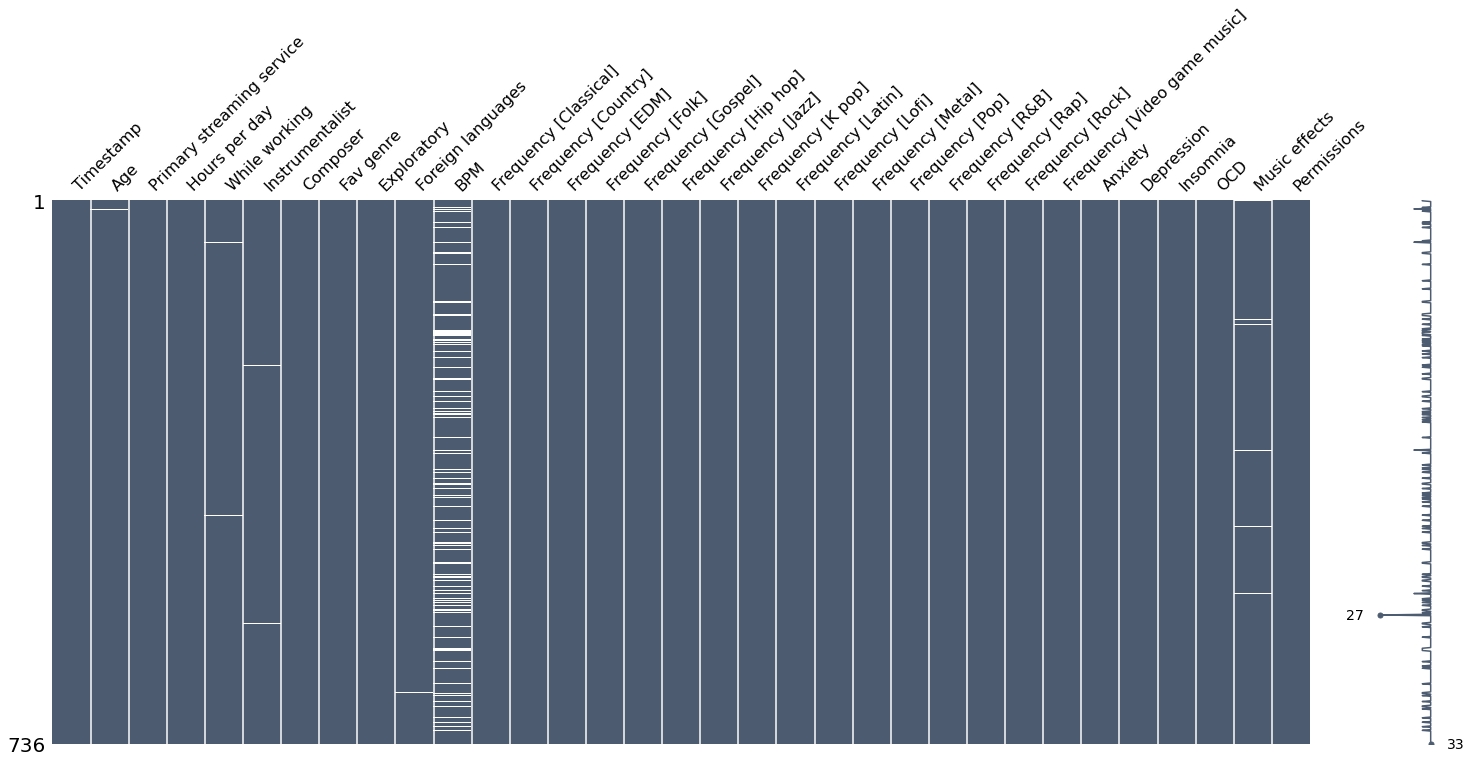

In [8]:
# Plotting missing data as white lines 
# imported missingno as msno

msno.matrix(mxmh,color=(0.3,0.36,0.44))

## EDA

Exploratory Data Analysis (EDA) helps one analyze datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. The goal is to explore, investigate and learn, as opposed to confirming statistical hypotheses and hence, we begin with the same.

#### Correlation
Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

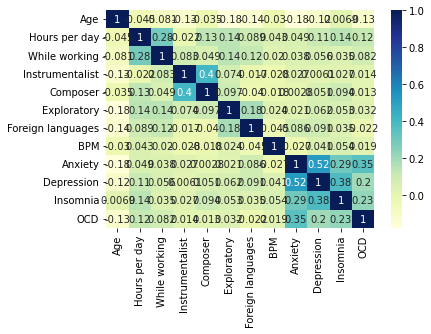

<Figure size 1440x720 with 0 Axes>

In [9]:
# Correlation

correlation = mxmh.corr()
hm = sns.heatmap(correlation, cmap="YlGnBu", annot =True)
#plt.figure(figsize=(8, 6)
plt.figure(figsize=(20,10))
plt.show()

From the heatmap above, there seems to be a positive correlation between Depression and Anxiety, Depression and Insomnia and Anxiety and OCD.

#### Music Trends

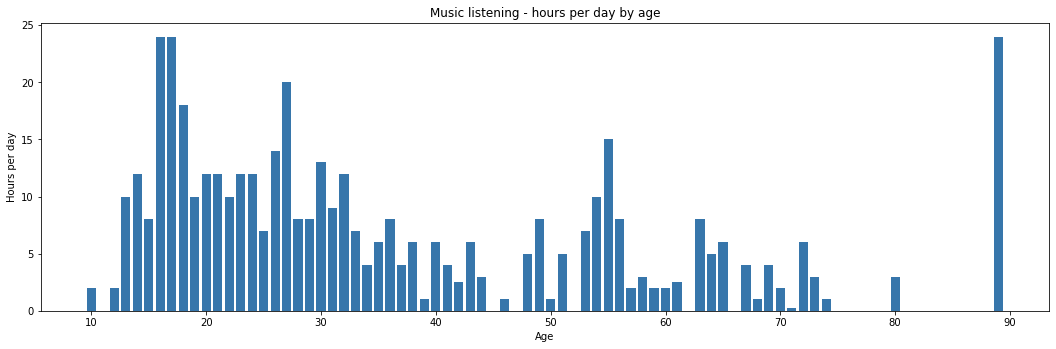

In [10]:
#Plotting hours of music listened to in a day by age
x=mxmh['Age']
y=mxmh['Hours per day']
fig = plt.figure(figsize=(14, 4))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y, color = '#3776ab')
ax.set_xlabel('Age')
ax.set_ylabel('Hours per day')
ax.set_title('Music listening - hours per day by age')
plt.show()

Examining the plot, it is evident that ages 13-25 listen to music for longer of the day. It is also quite interesting to see that age group 50-60 also listen to music for a long part if the day

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

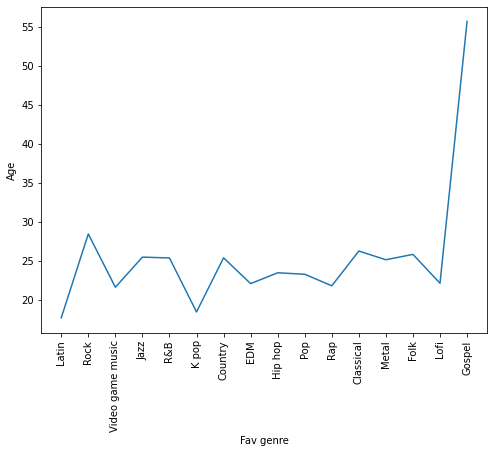

In [11]:
#Plotting Fav genres listened to by age
plt.figure(figsize=(8,6))
sns.lineplot(x=mxmh['Fav genre'], y=mxmh['Age'], ci=None)
plt.xticks(rotation=90)

From the line plot above, people around age of 20 are interested in Latin, K pop and Rap songs whereas Gospel is more famous in people around age of 50 and above.  Besides these above-mentioned genres are heard by people from age of 20 to 30.

<AxesSubplot:xlabel='Fav genre', ylabel='Hours per day'>

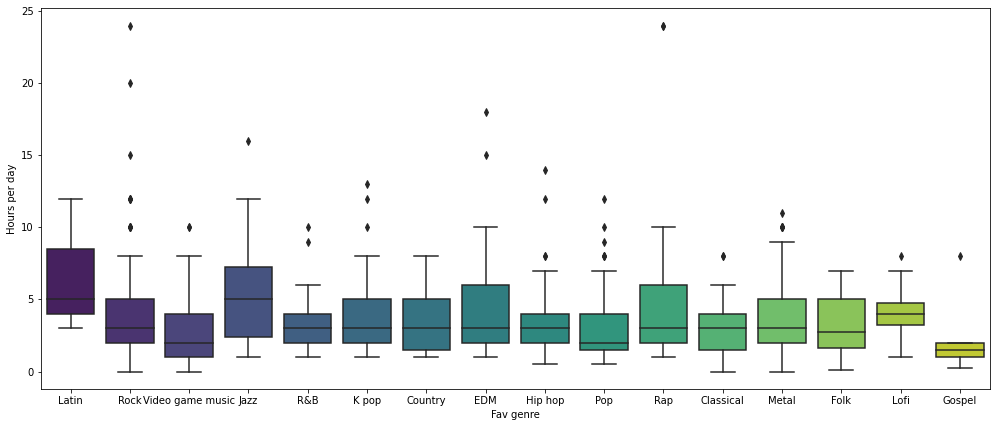

In [12]:
# Hours of specific genre's listened to - finding descriptive stats through box plot
plt.figure(figsize=(17,7))
sns.boxplot(x=mxmh['Fav genre'], y=mxmh['Hours per day'], palette="viridis")

People with 12 hours a day (max) music listening listen Latin and Jazz genre music more. People listening music of Gospel genre are extremely low in numbers.
Latin and Jazz is heard for about 5 hours per day at average; followed by rock, R&B, K Pop, Country, EDM, Hip Hop, Rap, Classical, metal and Folk at an average of 4 hours/ day.


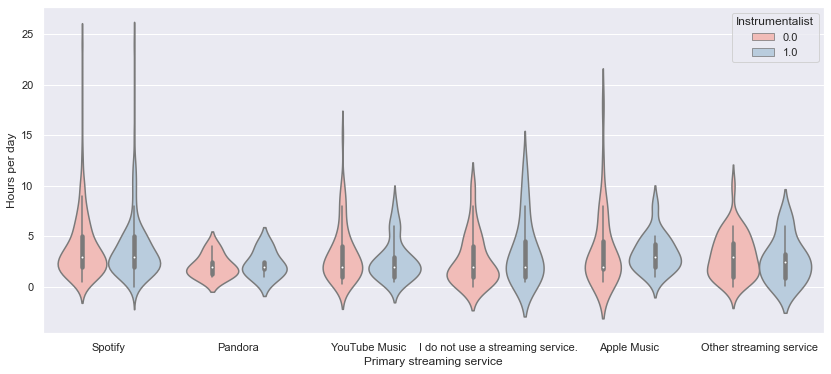

In [13]:
#Plotting hours of music listened by instrumentalists and their Primary streaming service
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

# Grouped violinplot
fig = plt.figure(figsize=(14, 6))
sns.violinplot(x="Primary streaming service", y="Hours per day", hue="Instrumentalist", data=mxmh, palette="Pastel1")
plt.show()

Majority of instrumentalists (red violin) use Spotify upto 4 hours a day and so do majority of non-instrumentalists (blue violin). YouTube music and Apple music are highly used by non-instrumentalists. 

<AxesSubplot:xlabel='While working', ylabel='count'>

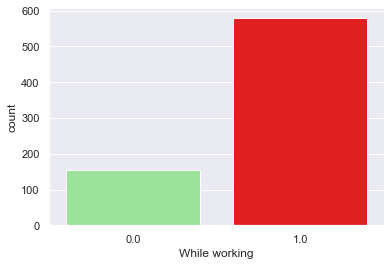

In [14]:
# Plotting if respondents listen to music while working
plt.figure(figsize=(6,4))
sns.countplot(x=mxmh['While working'], palette=["lightgreen","red"])

Around 80% people like to hear music while working.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

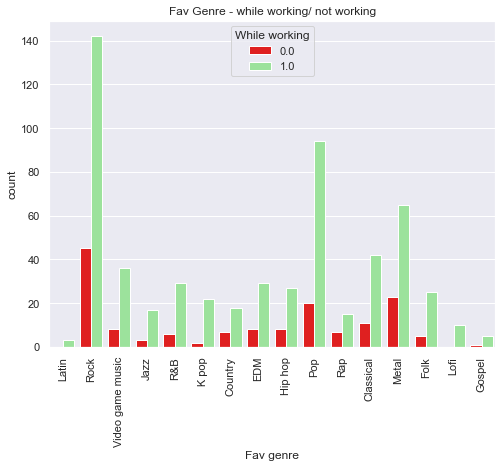

In [15]:
# Plotting Fav Genre's listened to while working/ not working
plt.figure(figsize=(8,6))
sns.countplot( x=mxmh['Fav genre'], hue=mxmh['While working'], 
                  palette=["red","lightgreen"]).set_title('Fav Genre - while working/ not working')
plt.xticks(rotation=90)

The plot above depicts the favourite genre of people listening to music while working/ not working. The green bars represent favourite genre of the ones who listen while working and the red bars are the favourite genre for respondents who don’t listen to music while working.
Findings show that Rock and Pop music are favourite genres of people who listen to music while working. Rock, Pop and Metal are favourite genres of people who don’t listen to music while working. The least favourite music for people who work is Latin and Gospel and the least favourite for the ones who don’t work is Gospel and K-Pop.


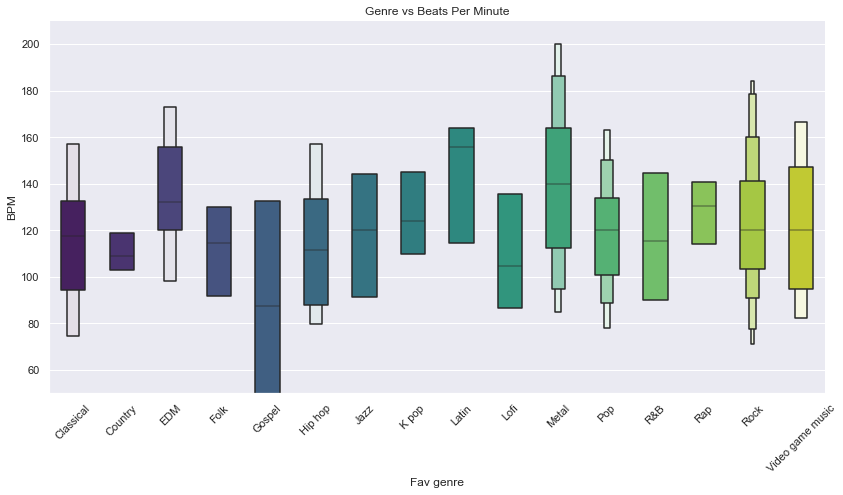

In [16]:
# Plotting BPM by GENRE 
sns.catplot(
    data=mxmh.sort_values("Fav genre"),
    x="Fav genre", y="BPM", kind="boxen",
    height=6, aspect=2,
    width = 0.5, 
    showfliers=False, palette="viridis",
)

plt.xticks(rotation = 45)
plt.title('Genre vs Beats Per Minute')
plt.ylim(50, 210)
plt.show()

Metal music has the maximum number of beats per minute, followed by rock music. 



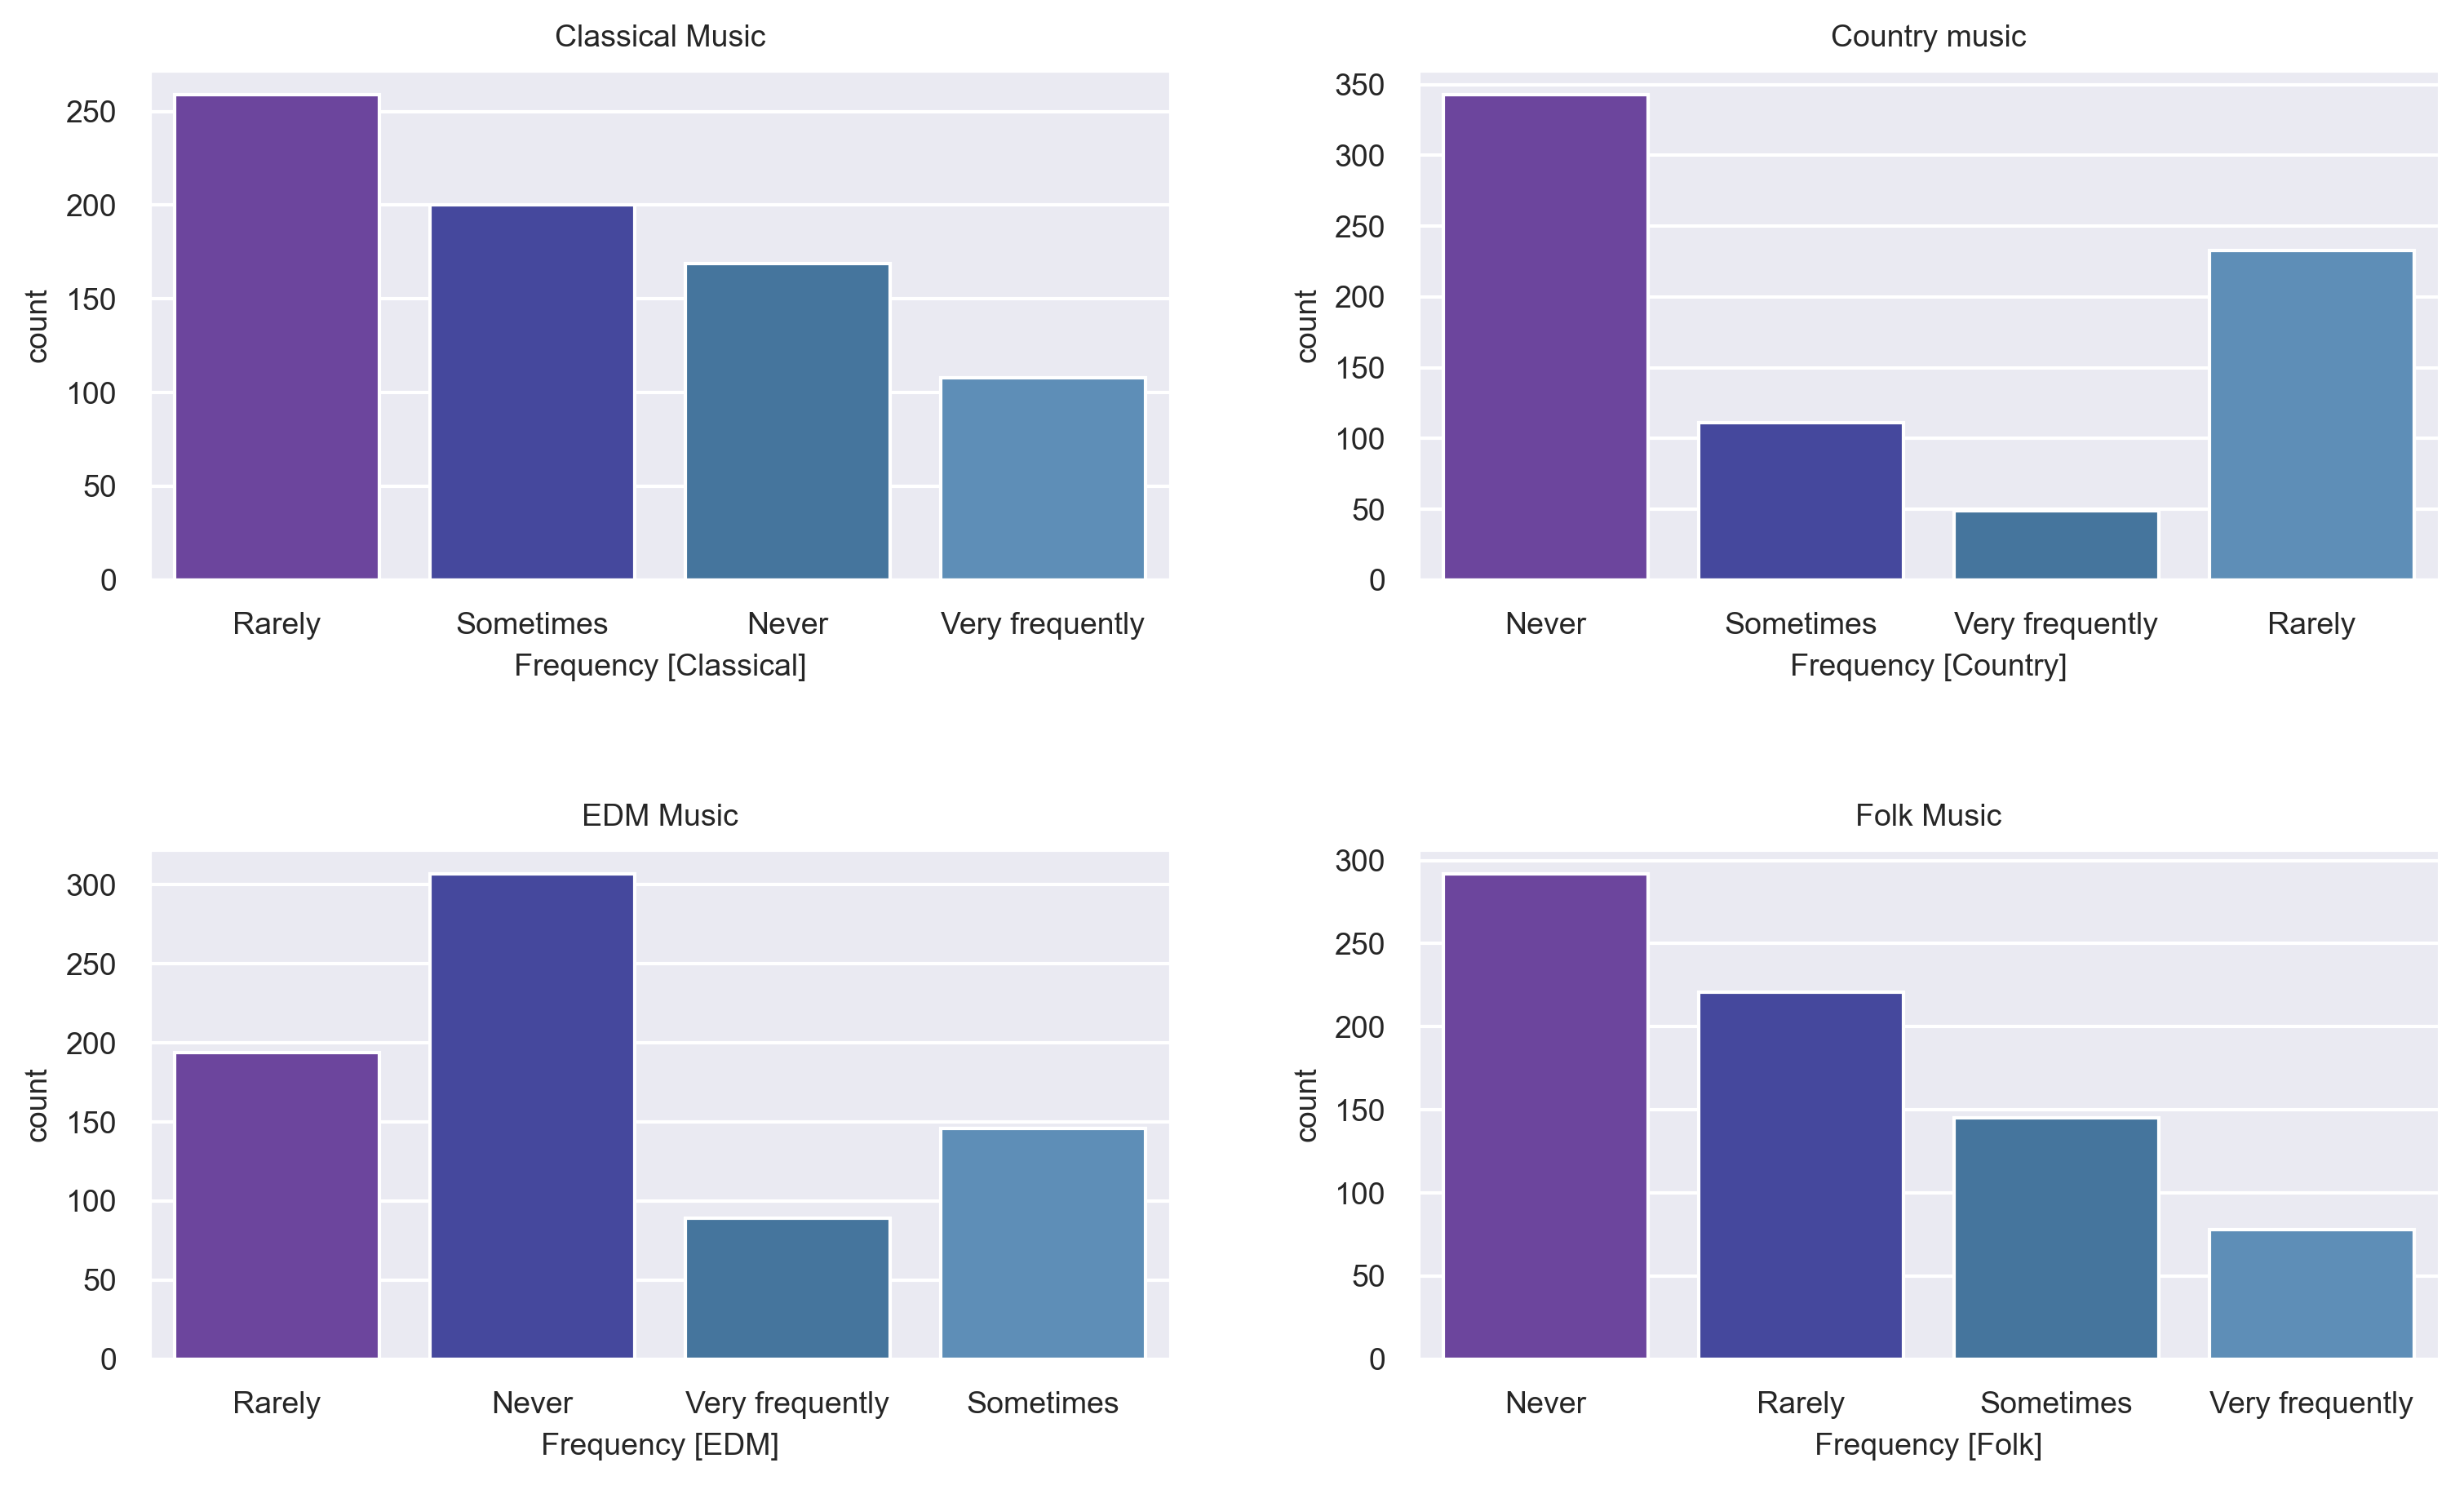

In [17]:
#Frequency of genre's listened to by respondents
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 9,
                          'xtick.labelsize': 9, 'ytick.labelsize': 9,
                          'legend.title_fontsize': 7, 'axes.titlesize': 9, 
                          'axes.titlepad': 7}):

    sns.color_palette("viridis", as_cmap=True)
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw = {'width_ratios': [4, 4], 
                                                'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
    
    ## 1st graph

    sns.countplot(ax=ax_flat[0], x=mxmh['Frequency [Classical]'], palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Classical Music')    

    ## 2nd graph
    sns.countplot(ax=ax_flat[1], x=mxmh['Frequency [Country]'], palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Country music')    
       
    ## 3rd graph
    sns.countplot(ax=ax_flat[2], x=mxmh['Frequency [EDM]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('EDM Music')    
   
    
    ## 4th graph
    sns.countplot(ax=ax_flat[3], x=mxmh['Frequency [Folk]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Folk Music')    
    
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=3)
    plt.show()

- Classical music: Most people rarely listen to this genre
- Country music: Majority of respondents never listen to country music; some say rarely
- EDM: Majority of respondents never listen
- Folk: Folk genre is never heard by majority respondents


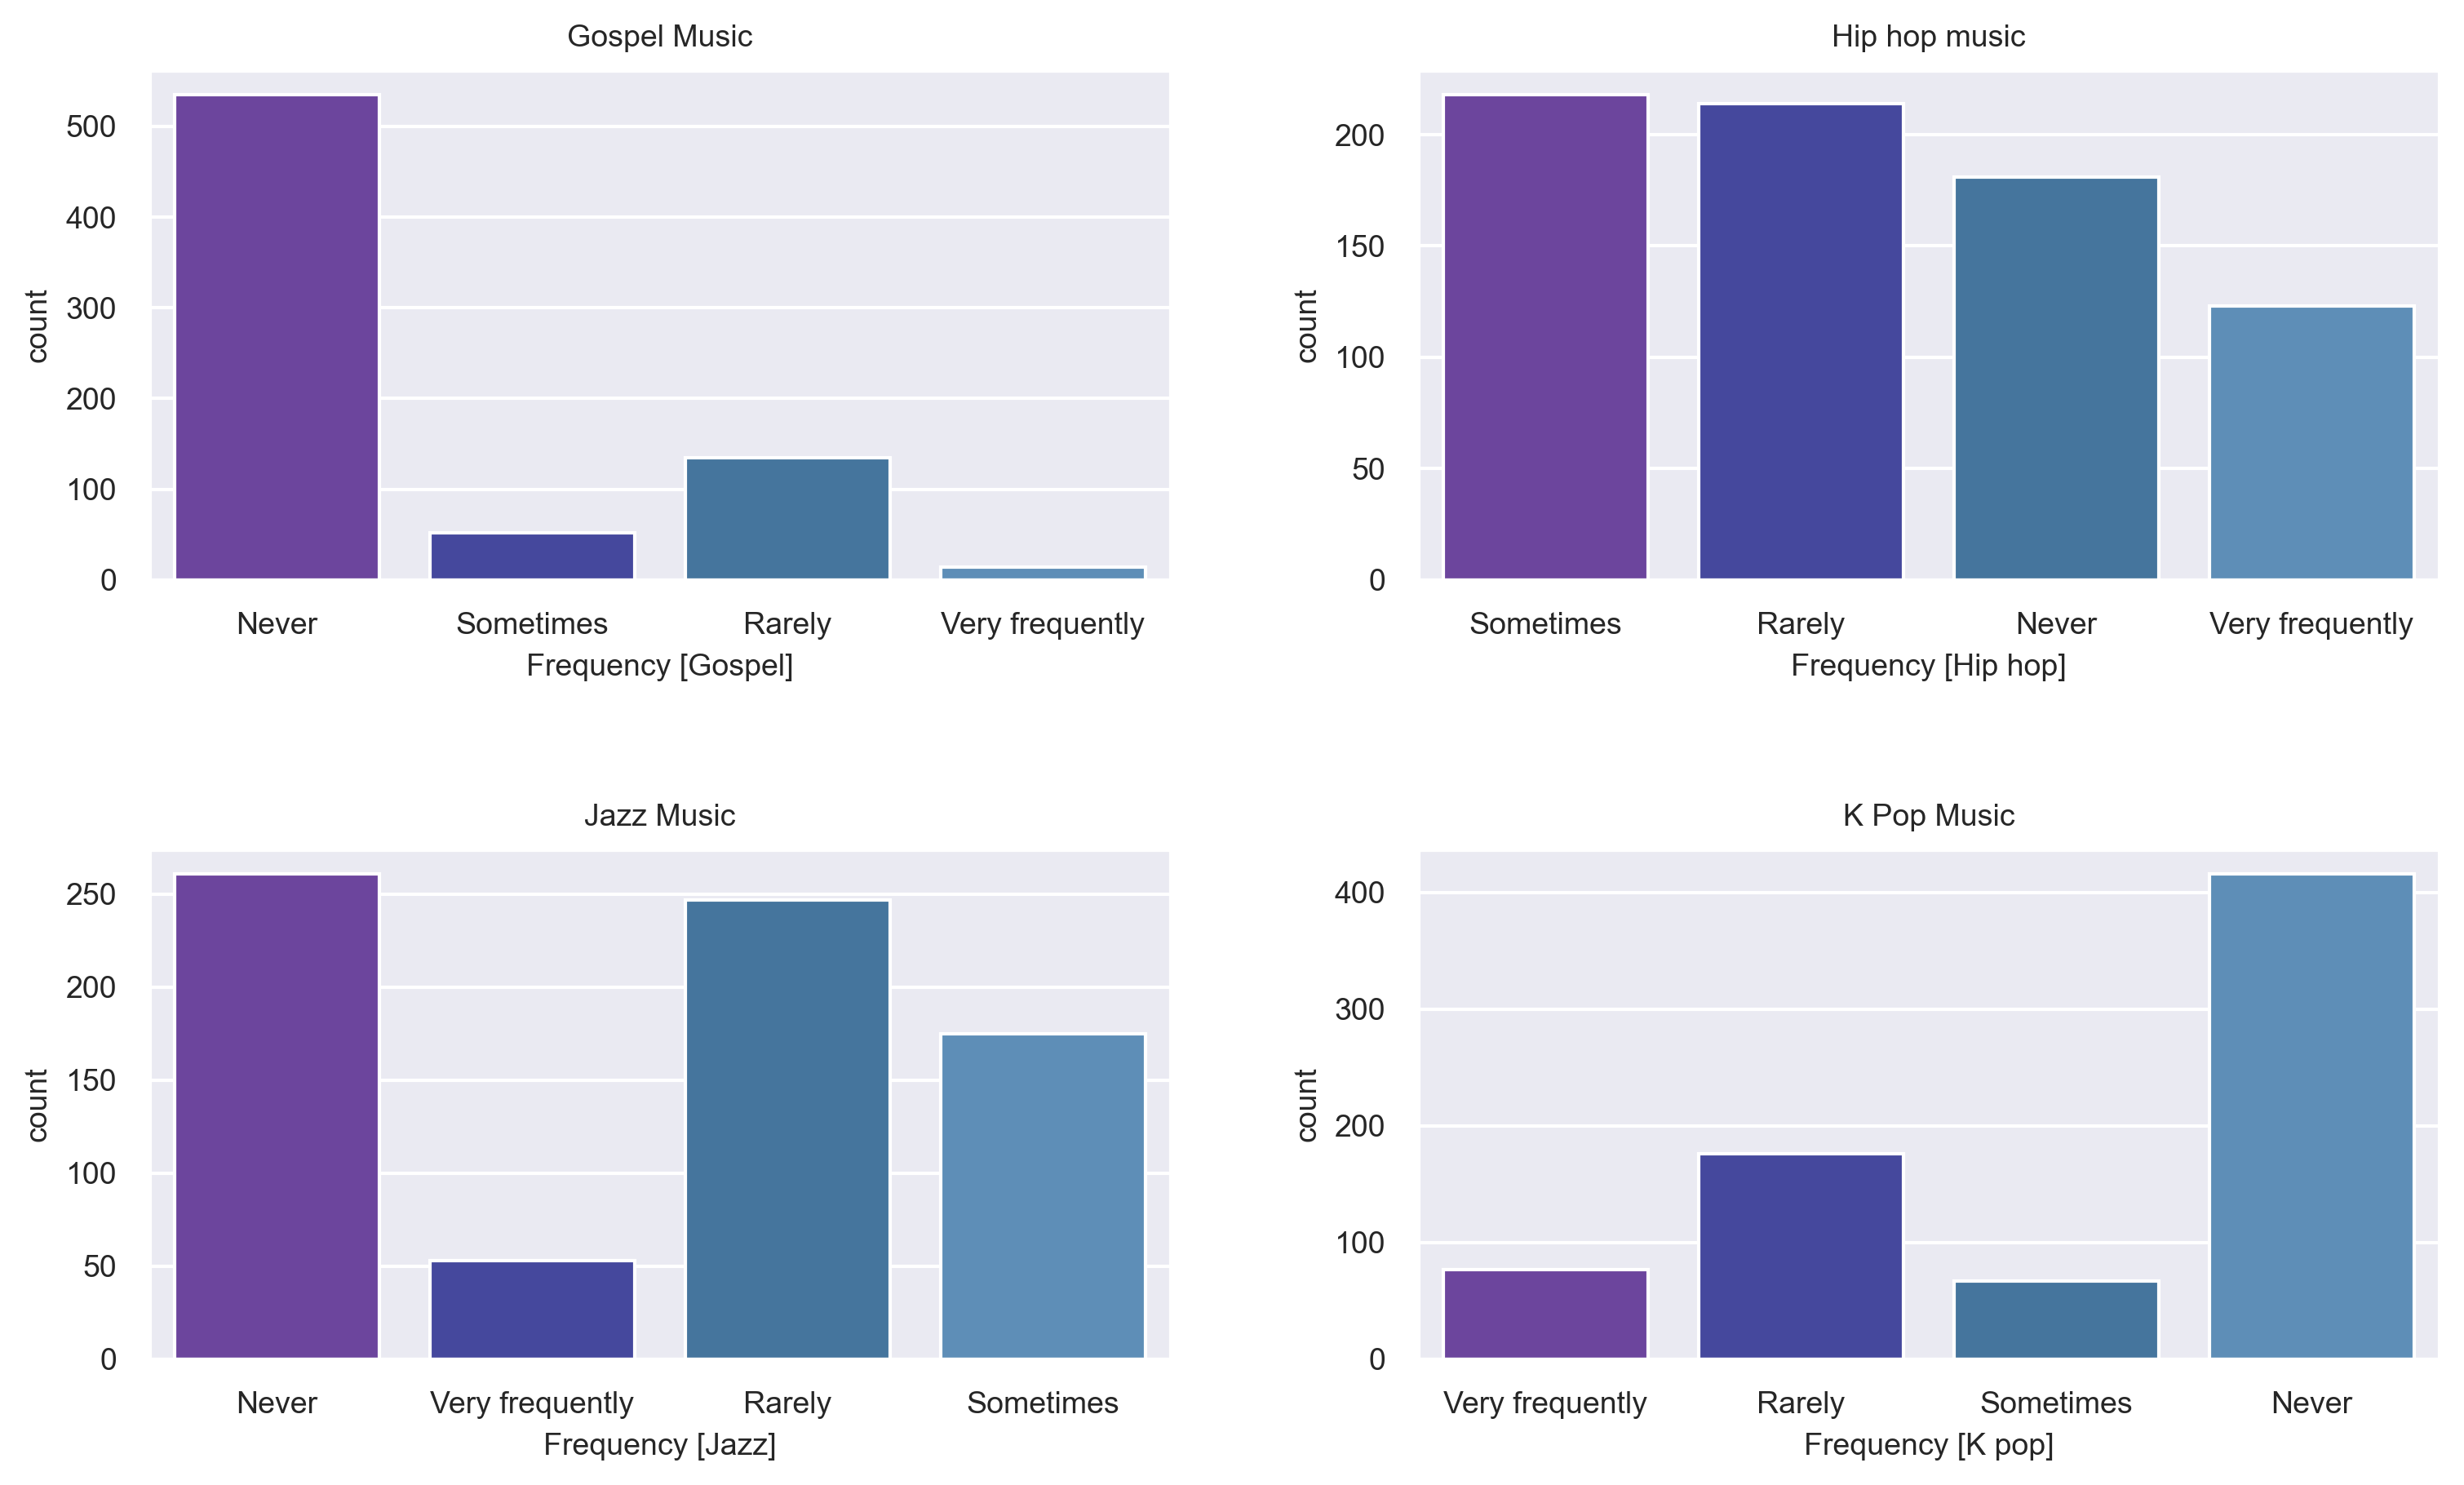

In [18]:
#Frequency of genre's listened to by respondents
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 9,
                          'xtick.labelsize': 9, 'ytick.labelsize': 9,
                          'legend.title_fontsize': 7, 'axes.titlesize': 9, 
                          'axes.titlepad': 7}):

      
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw = {'width_ratios': [4, 4], 
                                                'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
    
    ## 1st graph

    sns.countplot(ax=ax_flat[0], x=mxmh['Frequency [Gospel]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Gospel Music')    

    ## 2nd graph
    sns.countplot(ax=ax_flat[1], x=mxmh['Frequency [Hip hop]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Hip hop music')    
       
    ## 3rd graph
    sns.countplot(ax=ax_flat[2], x=mxmh['Frequency [Jazz]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Jazz Music')    
   
    
    ## 4th graph
    sns.countplot(ax=ax_flat[3], x=mxmh['Frequency [K pop]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('K Pop Music')    
    
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=3)
    plt.show()

- Gospel music: Gospel genre is never heard by majority respondents
- Hip Hop: Majority of respondents listen to hip hop music sometimes 
- Jazz: Majority of respondents never listen; although there are some that rarely listen
- K Pop: Never heard by majority respondents


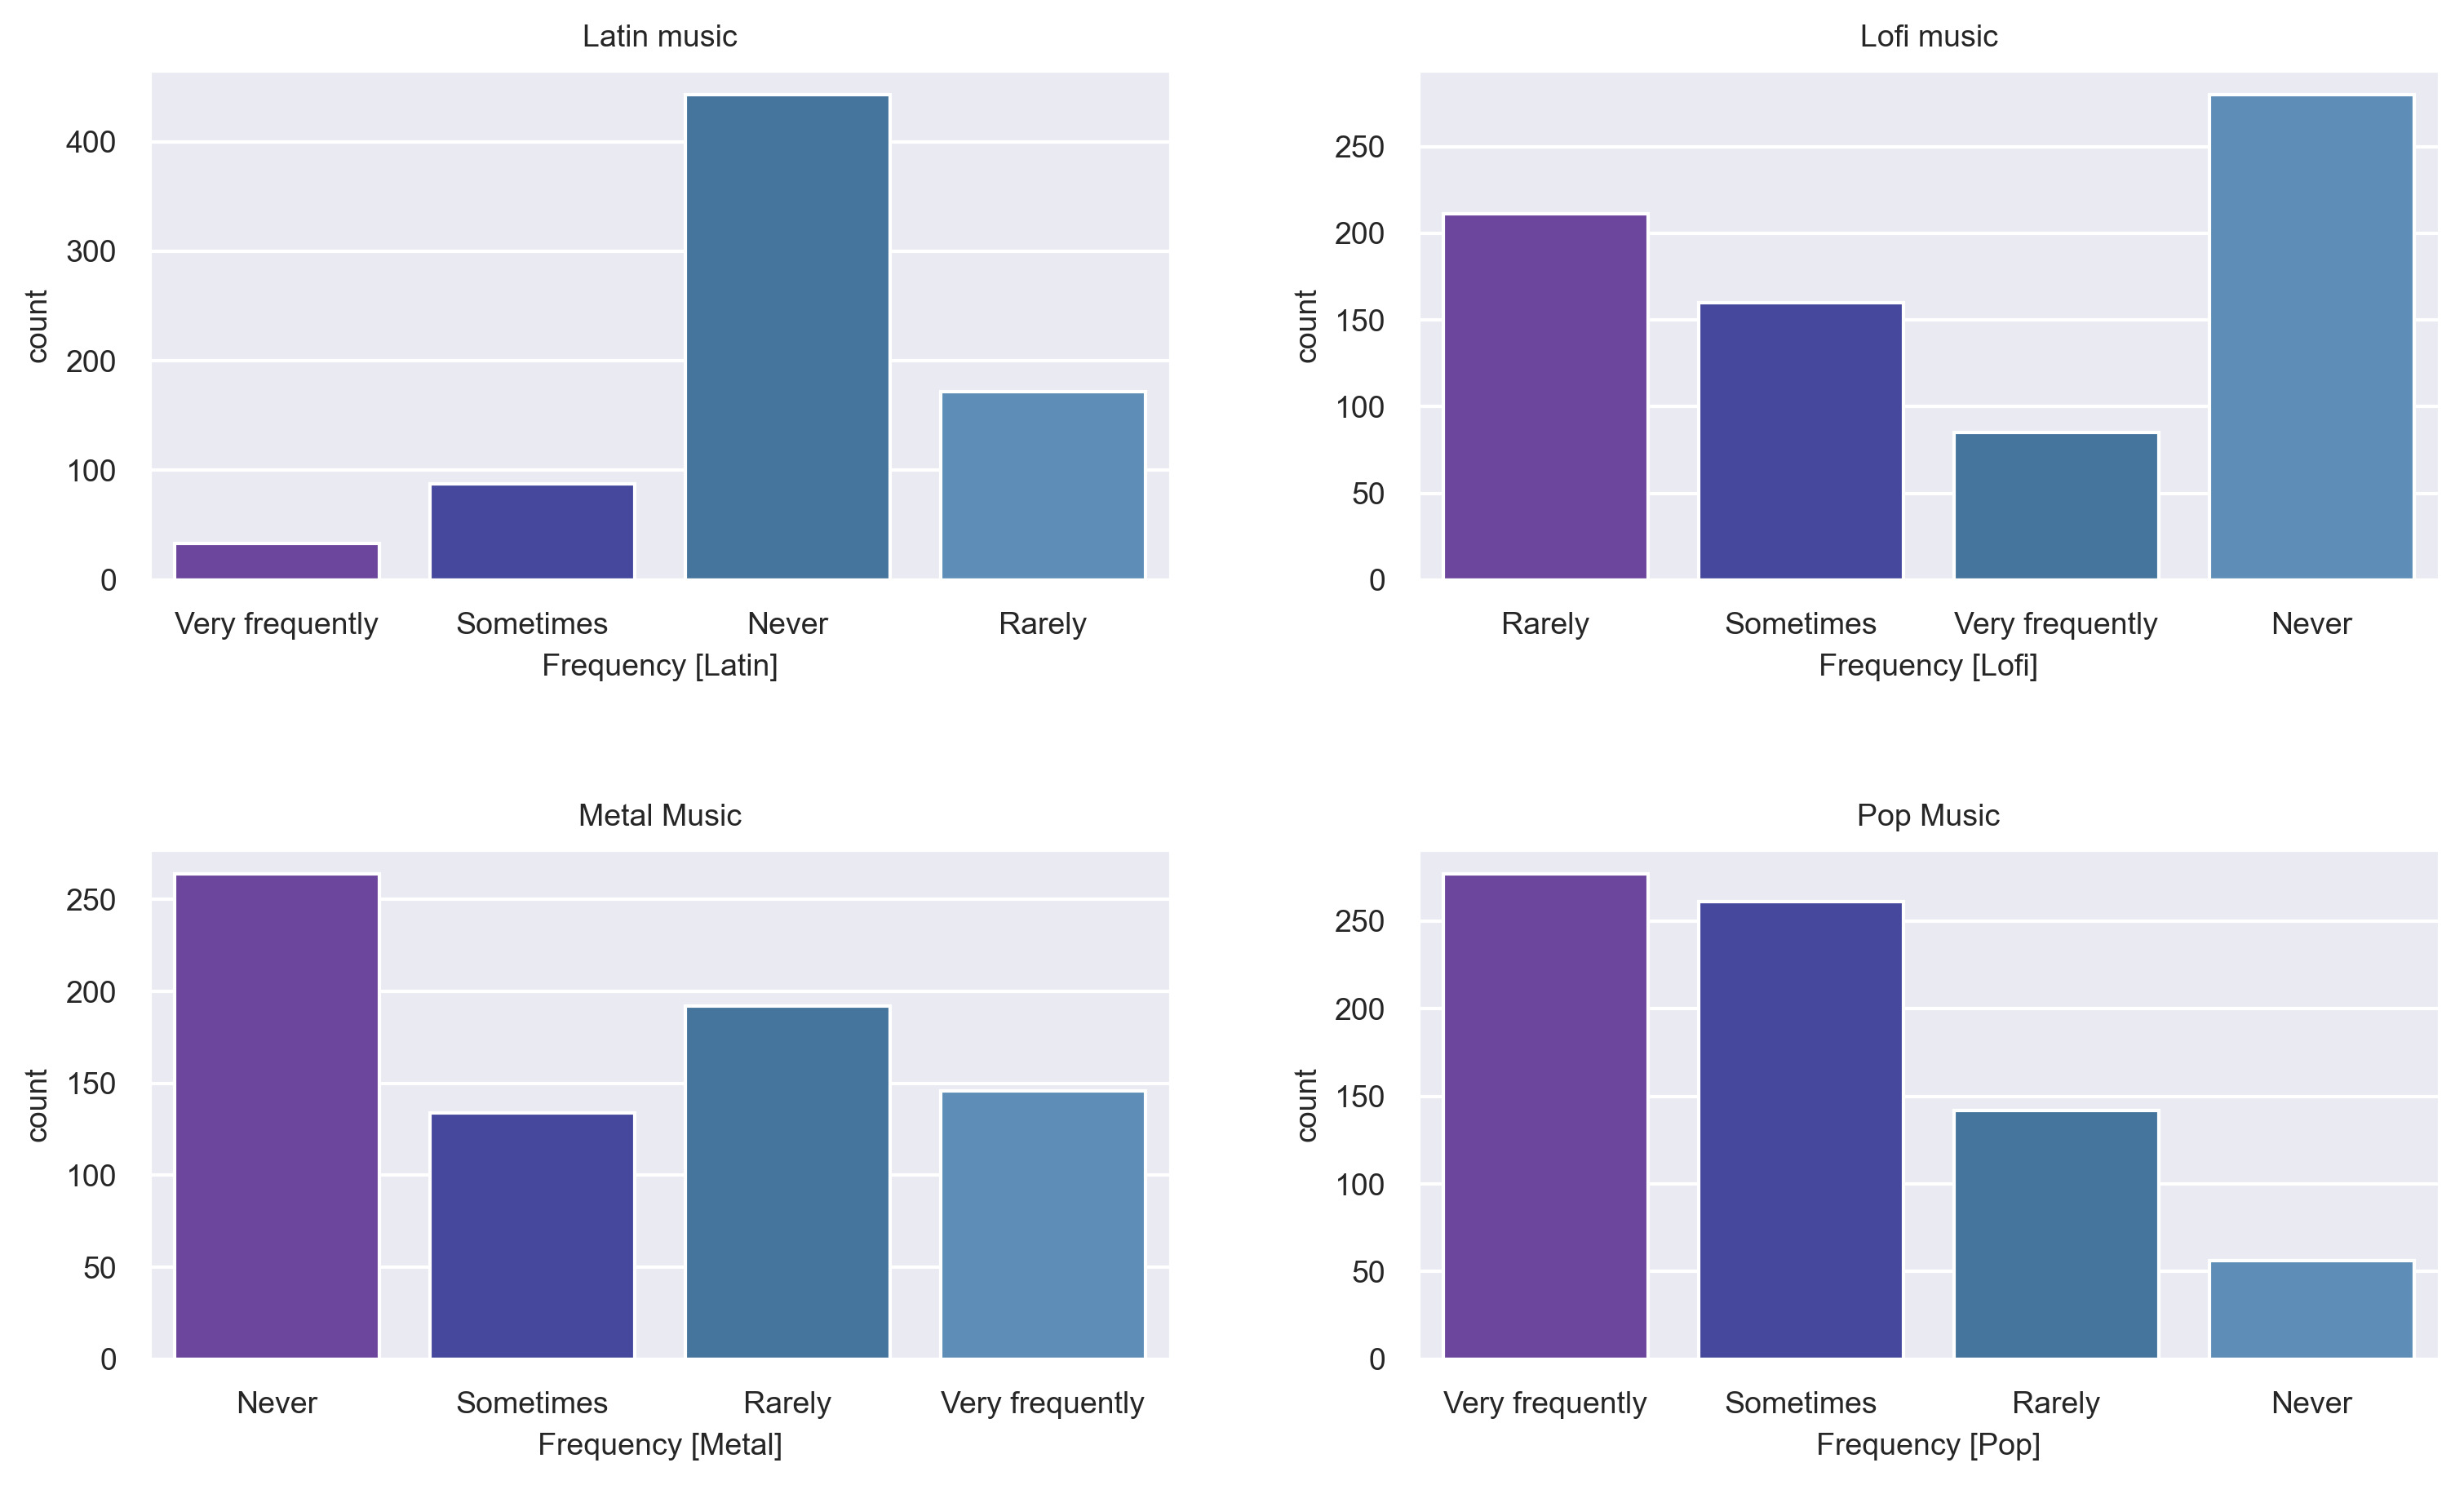

In [19]:
#Frequency of genre's listened to by respondents
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 9,
                          'xtick.labelsize': 9, 'ytick.labelsize': 9,
                          'legend.title_fontsize': 7, 'axes.titlesize': 9, 
                          'axes.titlepad': 7}):

      
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw = {'width_ratios': [4, 4], 
                                                'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
    
    ## 1st graph

    sns.countplot(ax=ax_flat[0], x=mxmh['Frequency [Latin]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Latin music')

    ## 2nd graph
    sns.countplot(ax=ax_flat[1], x=mxmh['Frequency [Lofi]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Lofi music')    
       
    ## 3rd graph
    sns.countplot(ax=ax_flat[2], x=mxmh['Frequency [Metal]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Metal Music')    
   
    
    ## 4th graph
    sns.countplot(ax=ax_flat[3], x=mxmh['Frequency [Pop]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Pop Music')    
    
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=3)
    plt.show()

- Latin music: Usually, never heard by majority respondents
- Lofi: Some respondents rarely listen to Lofi songs; some say rarely
- Metal: Respondents rarely listen to metal music; many say never as well
- Pop: Pop music is very frequently heard by majority respondents


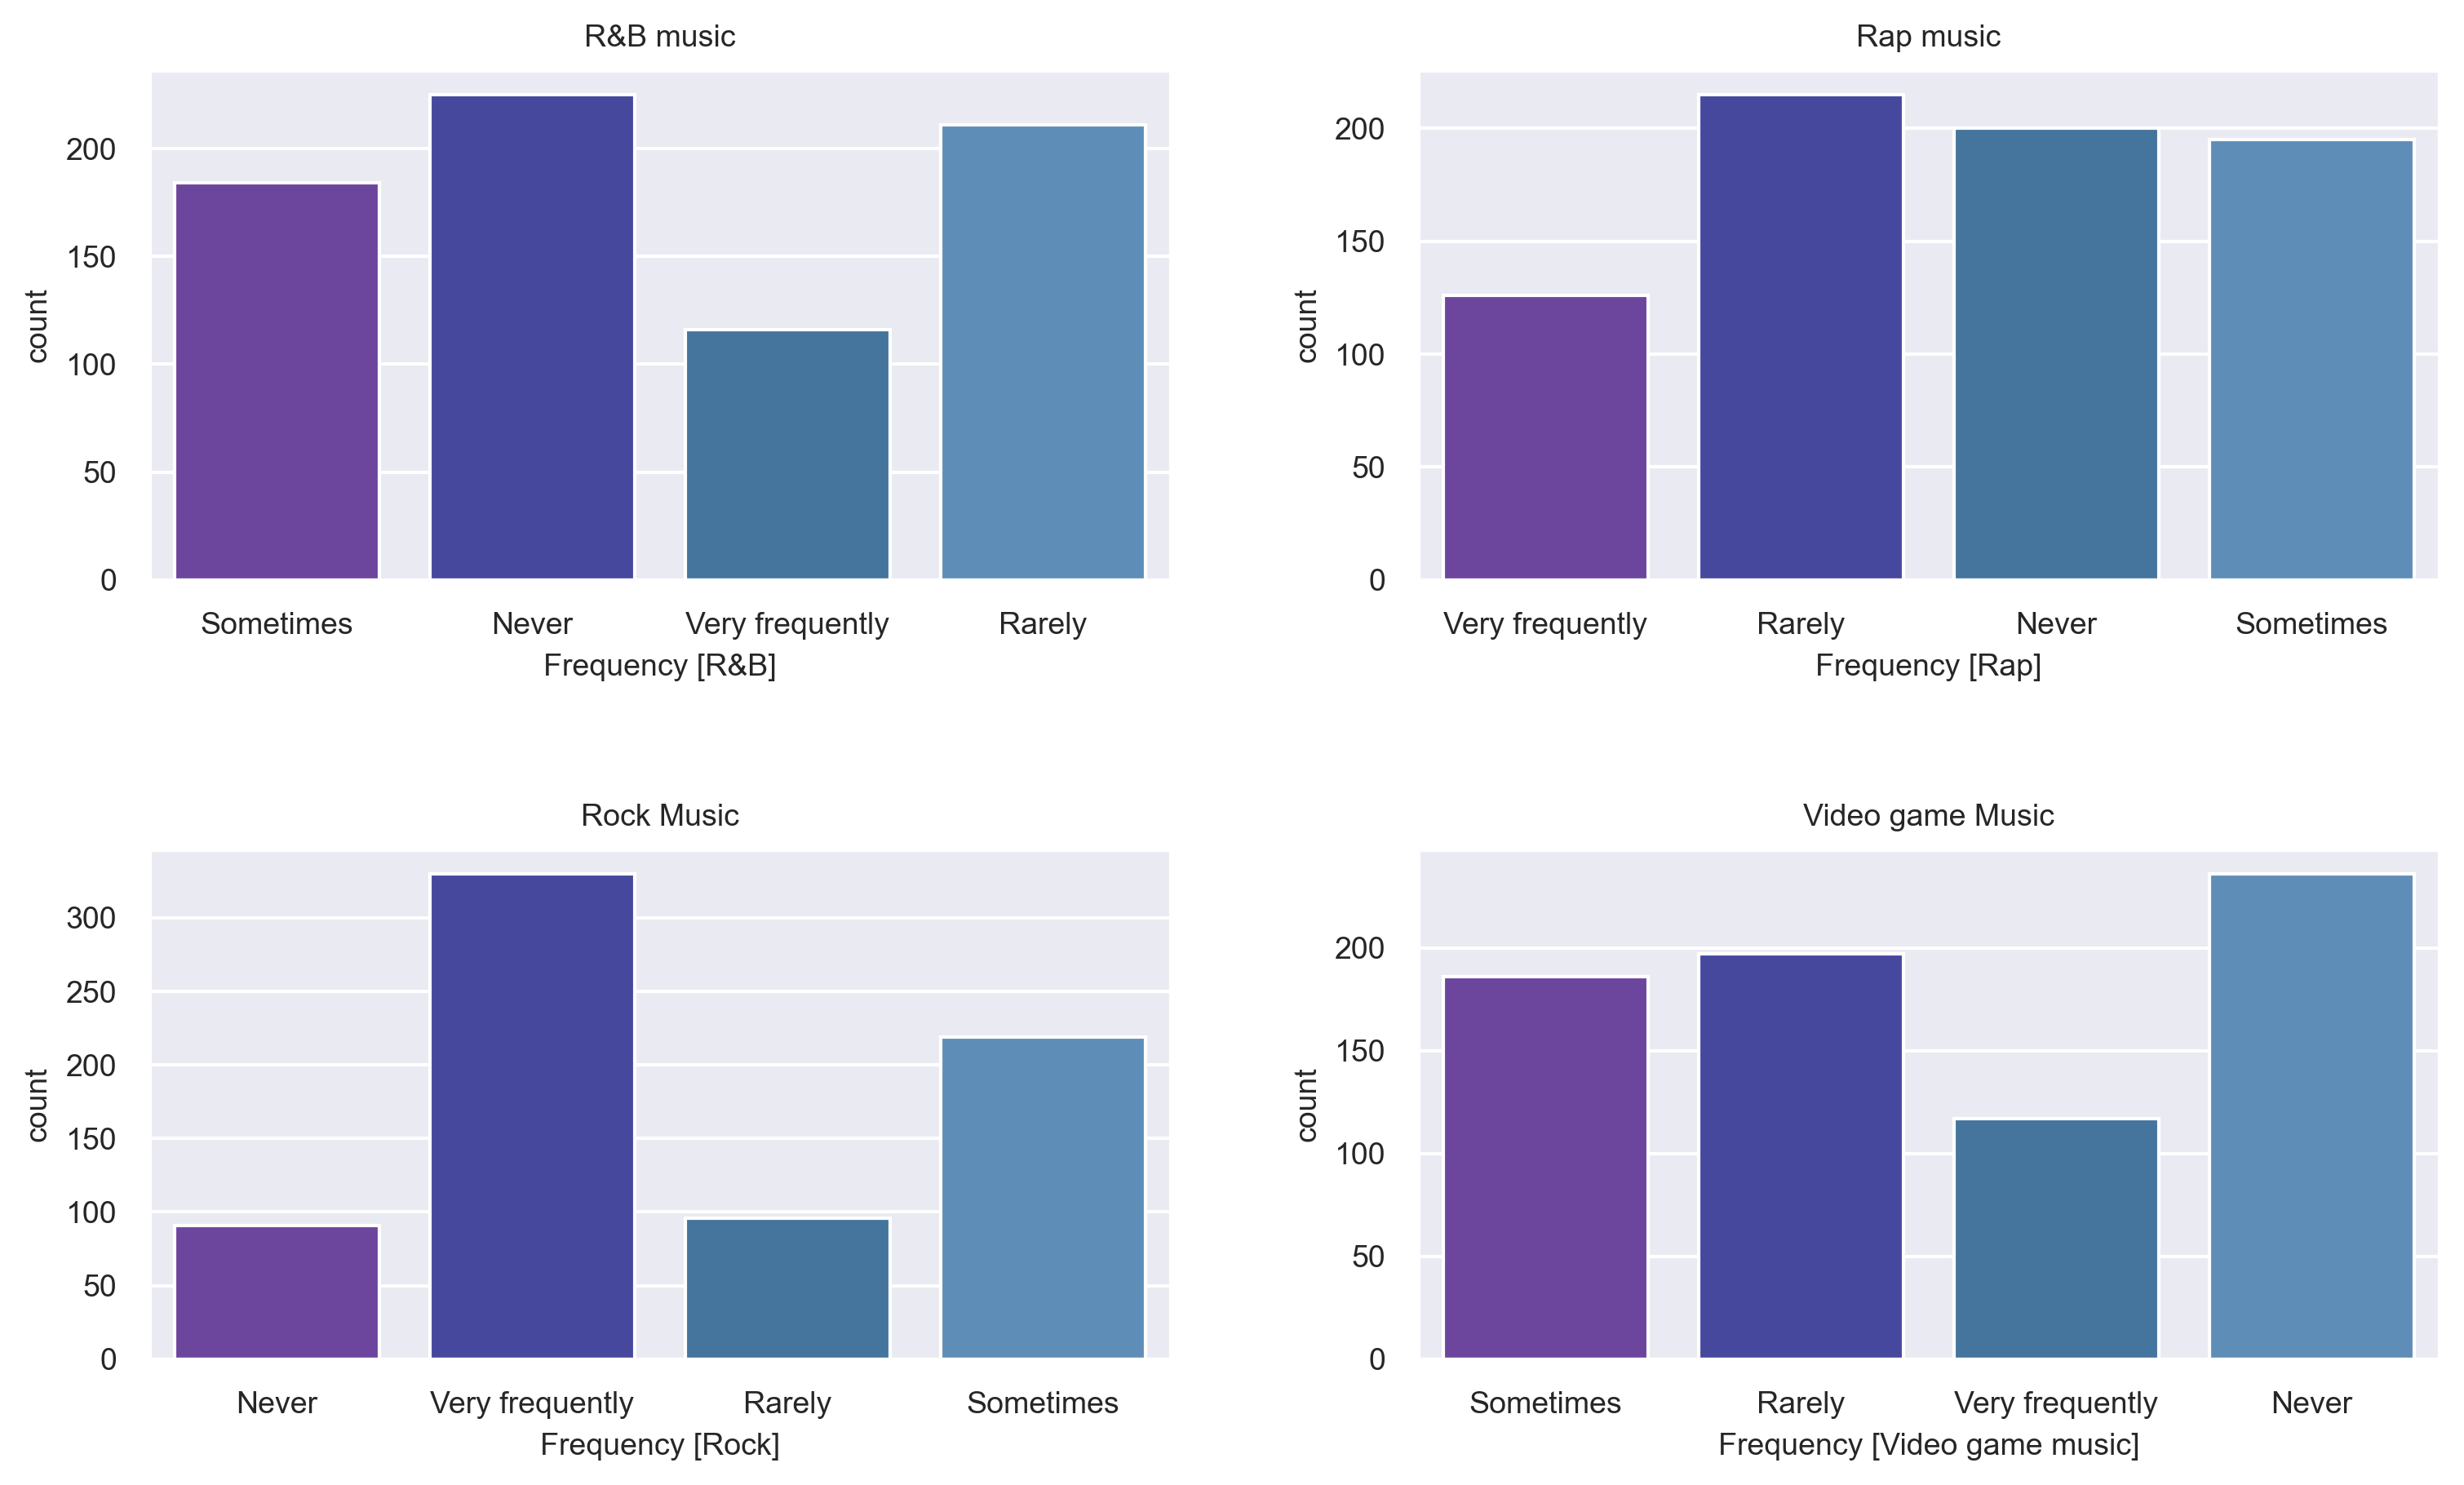

In [20]:
#Frequency of genre's listened to by respondents
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 9,
                          'xtick.labelsize': 9, 'ytick.labelsize': 9,
                          'legend.title_fontsize': 7, 'axes.titlesize': 9, 
                          'axes.titlepad': 7}):

      
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw = {'width_ratios': [4, 4], 
                                                'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
    
    ## 1st graph

    sns.countplot(ax=ax_flat[0], x=mxmh['Frequency [R&B]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('R&B music')

    ## 2nd graph
    sns.countplot(ax=ax_flat[1], x=mxmh['Frequency [Rap]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Rap music')    
       
    ## 3rd graph
    sns.countplot(ax=ax_flat[2], x=mxmh['Frequency [Rock]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Rock Music')    
   
    
    ## 4th graph
    sns.countplot(ax=ax_flat[3], x=mxmh['Frequency [Video game music]'],palette=["#6b37ab","#373bab", "#3776ab","#4f8fc6"]).set_title('Video game Music')    
    
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=3)
    plt.show()

- R&B music: Sometimes heard by respondents
- Rap: Some respondents rarely listen to Rap songs
- Rock music: Respondents very frequently listen to rock music
- Video Game music: Rarely heard by majority respondents


## Target based analysis

#### Self-reported mental health issues

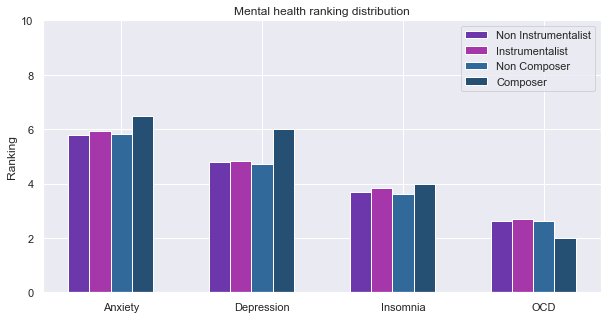

In [21]:
# Plotting mental health ranking distribution by Instrumentalists and composer
labels = ['Anxiety', 'Depression','Insomnia', 'OCD']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(10, 5))

b1 = ax.bar(x-2*width, mxmh[(mxmh.Instrumentalist == 0)].mean()[-4:], width, color = '#6b37ab', label = "Non Instrumentalist")
b2 = ax.bar(x-width, mxmh[(mxmh.Instrumentalist == 1)].mean()[-4:], width, color = '#a537ab', label = "Instrumentalist")
b3 = ax.bar(x, mxmh[(mxmh.Composer == 0)].mean()[-4:], width, color = '#316a9a', label = "Non Composer")
b4 = ax.bar(x+width, mxmh[(mxmh.Composer == 1)].median()[-4:], width, color = '#254f73', label = "Composer")

ax.set_ylim([0, 10])
ax.set_ylabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()
plt.show()

Anxiety- Composers have highest level of anxiety with a rank of 7 on 10. Followed by Instrumentalists who have anxiety ranking of 5.8 on 10. Whereas, the ones that are not a instrumentalist or a composer have low anxiety levels.

Depression- Composers have ranked themselves to have highest depression with an average having depression level of 6 on 10. All others have an average depression of 5 and below.

Insomnia – Composers and Instrumentalists have high average of insomnia compared to the ones that aren’t. 

OCD- Overall, OCD is the least health issue compared to other three listed above. Interestingly, composers have all other issue but have less OCD levels with an average ranking themselves to have 2 on 10.

Note: scale of 0 to 10, where: 
0 - I do not experience this
10 - I experience this regularly, constantly/or to an extreme.


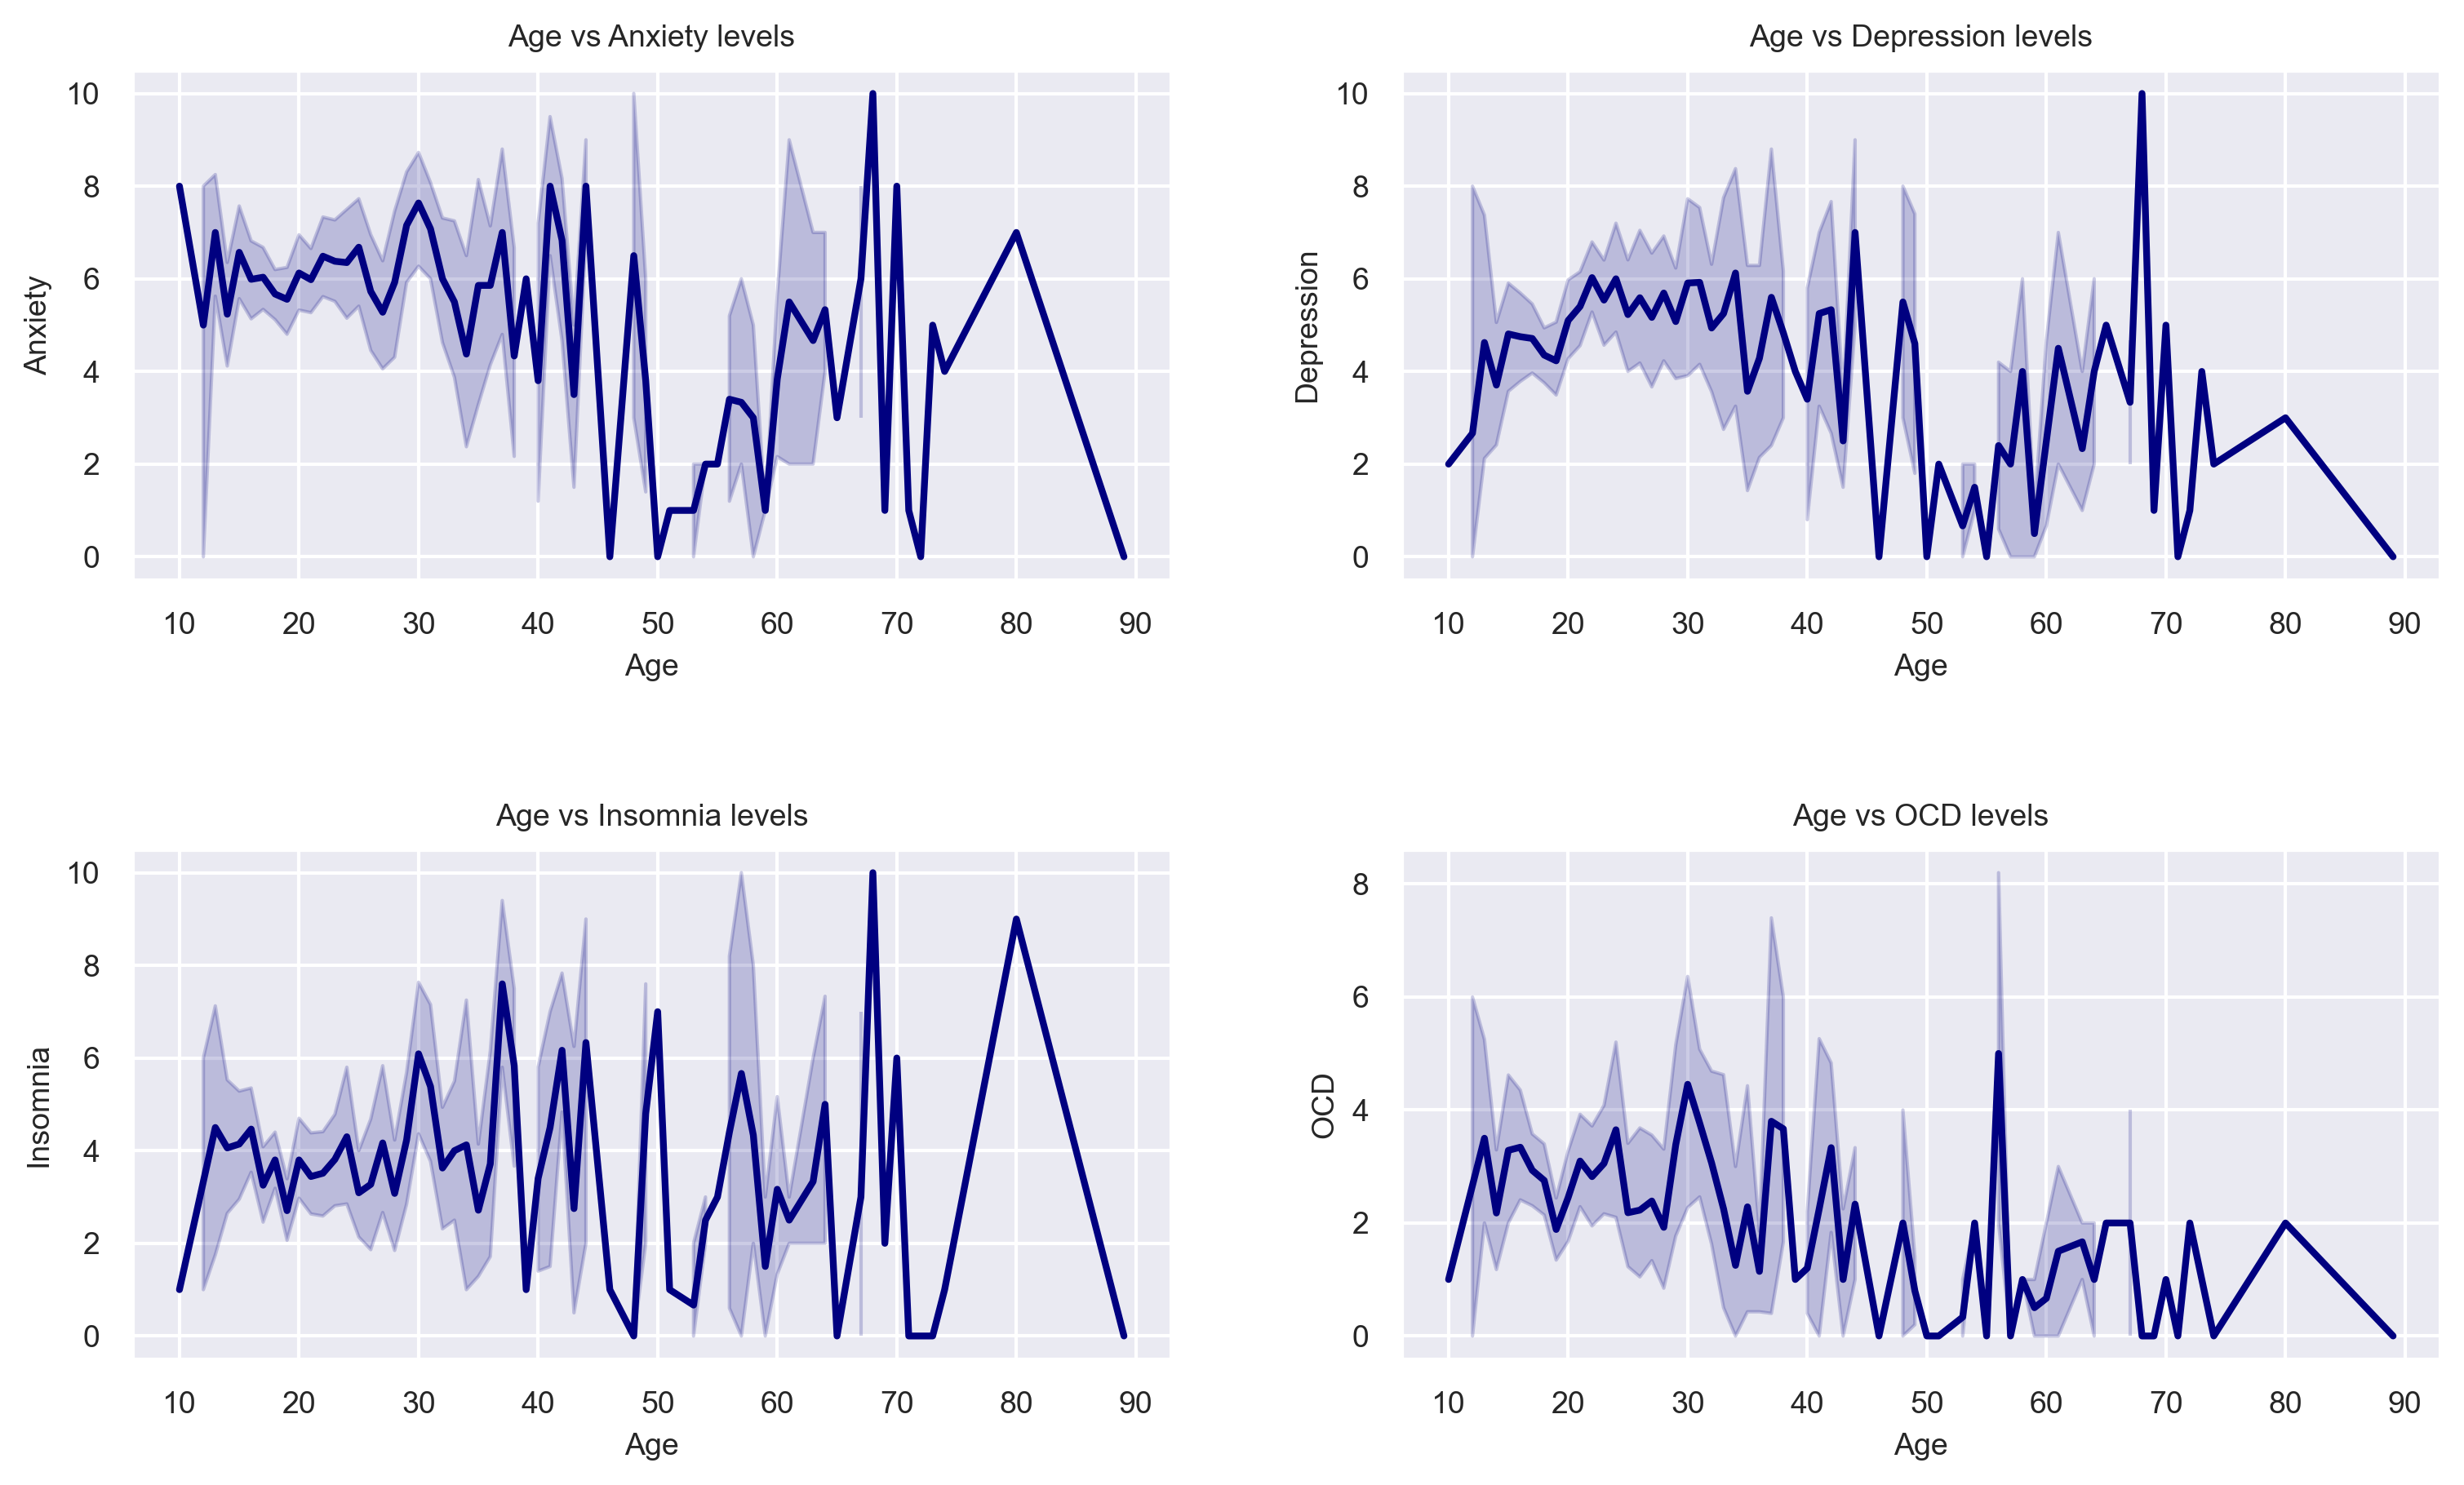

In [22]:
# Plotting age distribution of people who experience each mental condition
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 9,
                          'xtick.labelsize': 9, 'ytick.labelsize': 9,
                          'legend.title_fontsize': 7, 'axes.titlesize': 9, 
                          'axes.titlepad': 7}):
    
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw = {'width_ratios': [4, 4], 
                                                'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
    
    ## 1st graph
    sns.lineplot(ax=ax_flat[0], data = mxmh,
             x='Age', y='Anxiety', lw=2, color='navy').set_title('Age vs Anxiety levels')
    

    ## 2nd graph
    sns.lineplot(ax=ax_flat[1], data = mxmh,
                x='Age', y='Depression', lw=2, 
                color='navy').set_title('Age vs Depression levels')
       
    ## 3rd graph
    sns.lineplot(ax=ax_flat[2], data = mxmh,
                x='Age', y='Insomnia',  
                lw=2,color='navy').set_title('Age vs Insomnia levels')
   
    
    ## 4th graph
    sns.lineplot(ax=ax_flat[3], data = mxmh,
                x='Age', y='OCD', 
                lw=2,color='navy').set_title('Age vs OCD levels')  
    
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=3)
    plt.show()

Age vs Anxiety- 
Anxiety ranking seems have fluctuations as age increases. Younger age groups, below 30-year-olds have reported themselves to have very high anxiety levels. Ages 40-50 have little to no anxiety and it increases with 70-year-olds ranking themselves to face extreme anxiety ranking their anxiety level to be 10 on 10.

Age vs Depression-
Depression is likely to be high for age group 20-35 ranking themselves to have depression level 6 on 10. 45- and 50-year-olds seem to report themselves to have no anxiety at all. Depression is ranked at the highest level for oldies (ages 68-70) as after 70, depression level drops.

Age vs Insomnia-
Ages 40-50 year olds rate themselves to have high levels on insomnia which is justified that with age people seem to get insomnia. Ages 70 and 80 have ranked themselves to have the the highest insomnia level (10).

Age vs OCD-
OCD levels seem low overall with peak touching at age 58 scoring themselves 5 on 10.

Note: scale of 0 to 10, where: 
0 - I do not experience this
10 - I experience this regularly, constantly/or to an extreme.


## MUSIC EFFECTS

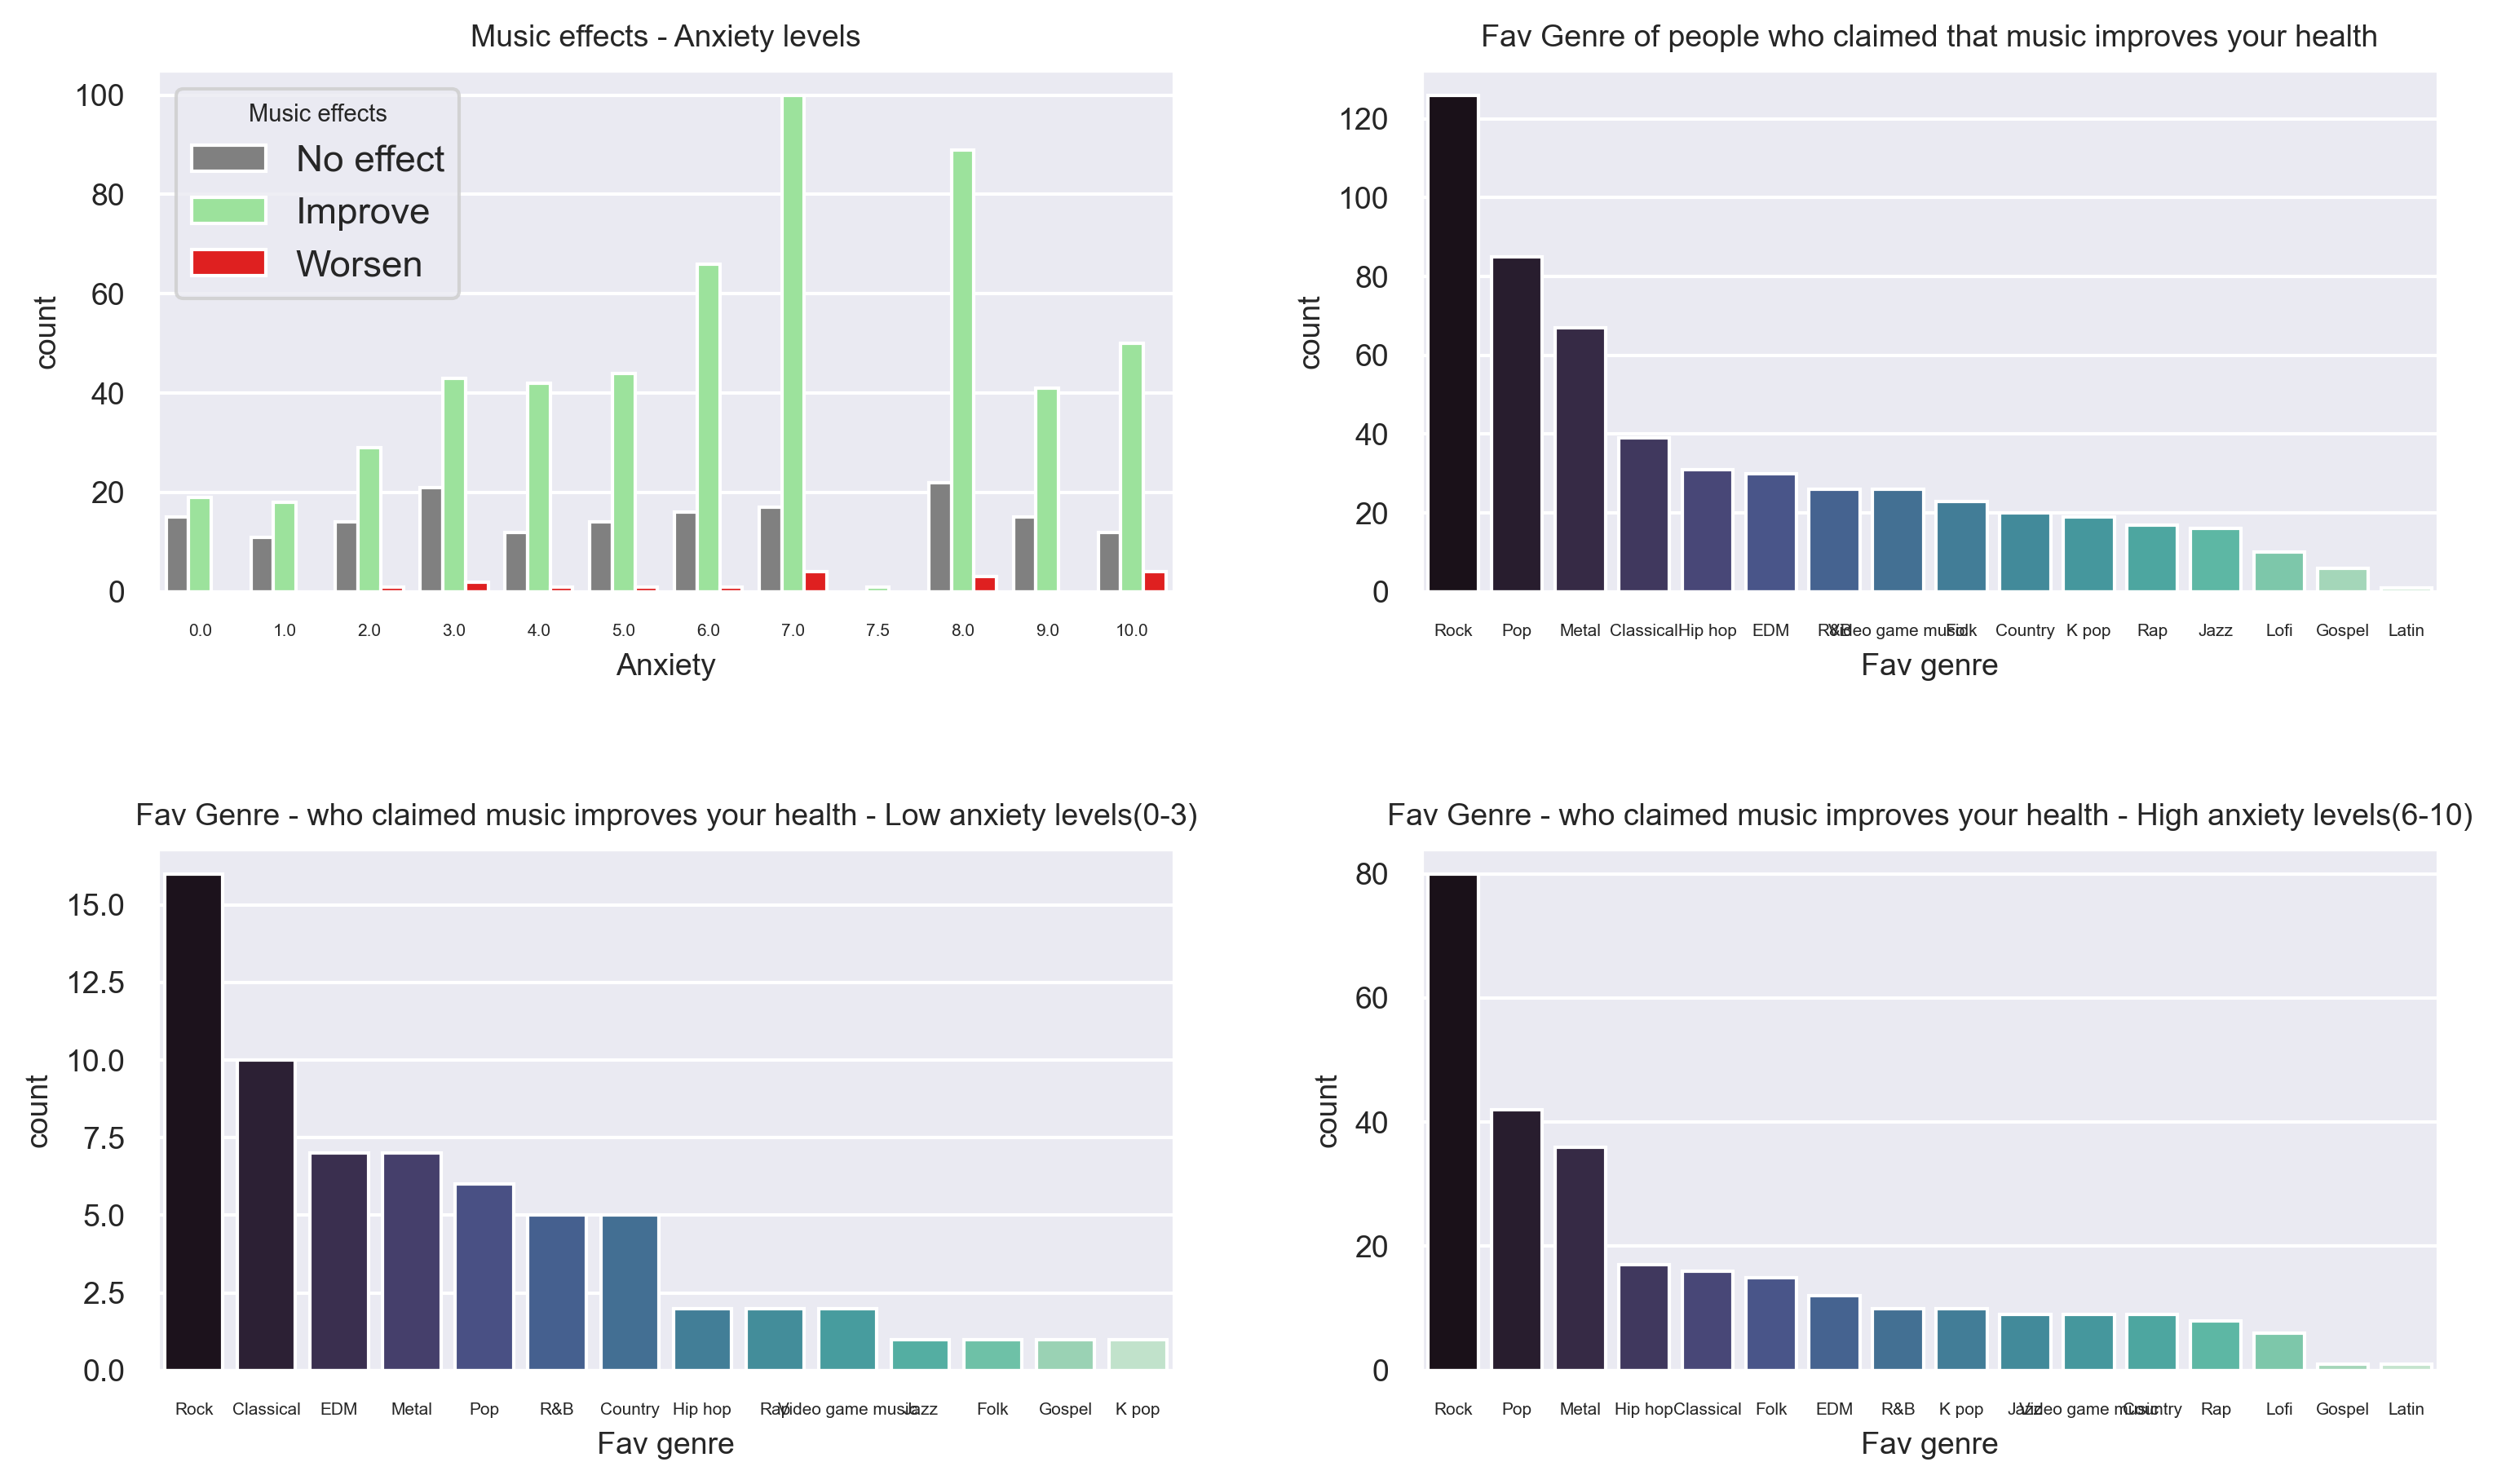

In [23]:
# Analysis based on Anxiety and music affects
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 9,
                          'xtick.labelsize': 5, 'ytick.labelsize': 9, 
                          'legend.title_fontsize': 7, 'axes.titlesize': 9,
                          'axes.titlepad': 7}):

    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw = {'width_ratios': [4, 4], 
                                                'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
    ax.tick_params(labelrotation=45)
        
    ## 1st graph
    sns.countplot(ax=ax_flat[0], x=mxmh['Anxiety'], hue=mxmh['Music effects'], 
                  palette=["grey","lightgreen","red"]).set_title('Music effects - Anxiety levels')
    
    ## 2nd graph
    music_improves_1=mxmh[mxmh['Music effects'] == 'Improve']
    ax.tick_params(labelrotation=45)
    sns.countplot(ax=ax_flat[1], x=music_improves_1['Fav genre'], 
                  palette="mako",
                  order = music_improves_1['Fav genre'].value_counts().index).set_title('Fav Genre of people who claimed that music improves your health')
   
    
    ## 3rd graph
    music_improves_anx=mxmh[(mxmh['Anxiety'] < 3) & (mxmh['Music effects'] == 'Improve')]
    sns.countplot(ax=ax_flat[2], x=music_improves_anx['Fav genre'], palette="mako",
                  order = music_improves_anx['Fav genre'].value_counts().index).set_title('Fav Genre - who claimed music improves your health - Low anxiety levels(0-3)')
 
    
    ## 4th graph
    music_improves_anx2=mxmh[(mxmh['Anxiety'] > 6) & (mxmh['Music effects'] == 'Improve')]
    sns.countplot(ax=ax_flat[3], x=music_improves_anx2['Fav genre'], palette="mako",
                  order = music_improves_anx2['Fav genre'].value_counts().index).set_title('Fav Genre - who claimed music improves your health - High anxiety levels(6-10)')
    
    
    #ax.tick_params(labelrotation=45)
    #plt.xticks(rotation = 45)
    #g.set_xticklabels(g.get_xticklabels(), rotation=45)
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=3)
    plt.show()

Subplot (1) – Music effects – anxiety levels:
x-axis: self-reported anxiety level scale where 0 - I do not experience this and 10 - I experience this regularly, constantly/or to an extreme.
y-axis: count
hue: the ones who’ve said music ‘improve’ mental health, music has ‘no effect’ over mental health and music ‘worsen’ mental health conditions
Summary: 
People with anxiety levels above 6 have said that they believe music improves mental conditions. There are extremely less number of people who have said that music worsens mental health issues. From the visualisations, it is evident that majority believe in music therapy. Moving forward, subplot(2) is when we plot the favourite genre people who say music ‘improves’ listen to..

Subplot (2) - Fav Genre of people who claimed that music improves your health
The ones who’ve said that music improves their health are the ones who have Rock and Pop as their favourite genres. Latin seems to be the least favourite to these people.

Subplot (3) - Fav Genre - who claimed music improves your health - Low anxiety levels(0-3)
This count plot indicates the favourite genre of people who claimed that music improves mental conditions and who have low anxiety levels (0-3). 
Rock, classical and metal music are their favourites.

Subplot (4) - Fav Genre - who claimed music improves your health - High anxiety levels(6-10)
This count plot indicates the favourite genre of people who claimed that music improves mental conditions and who have high anxiety levels (6-10). 
To this set, Rock, Pop and Metal music are their favourites.


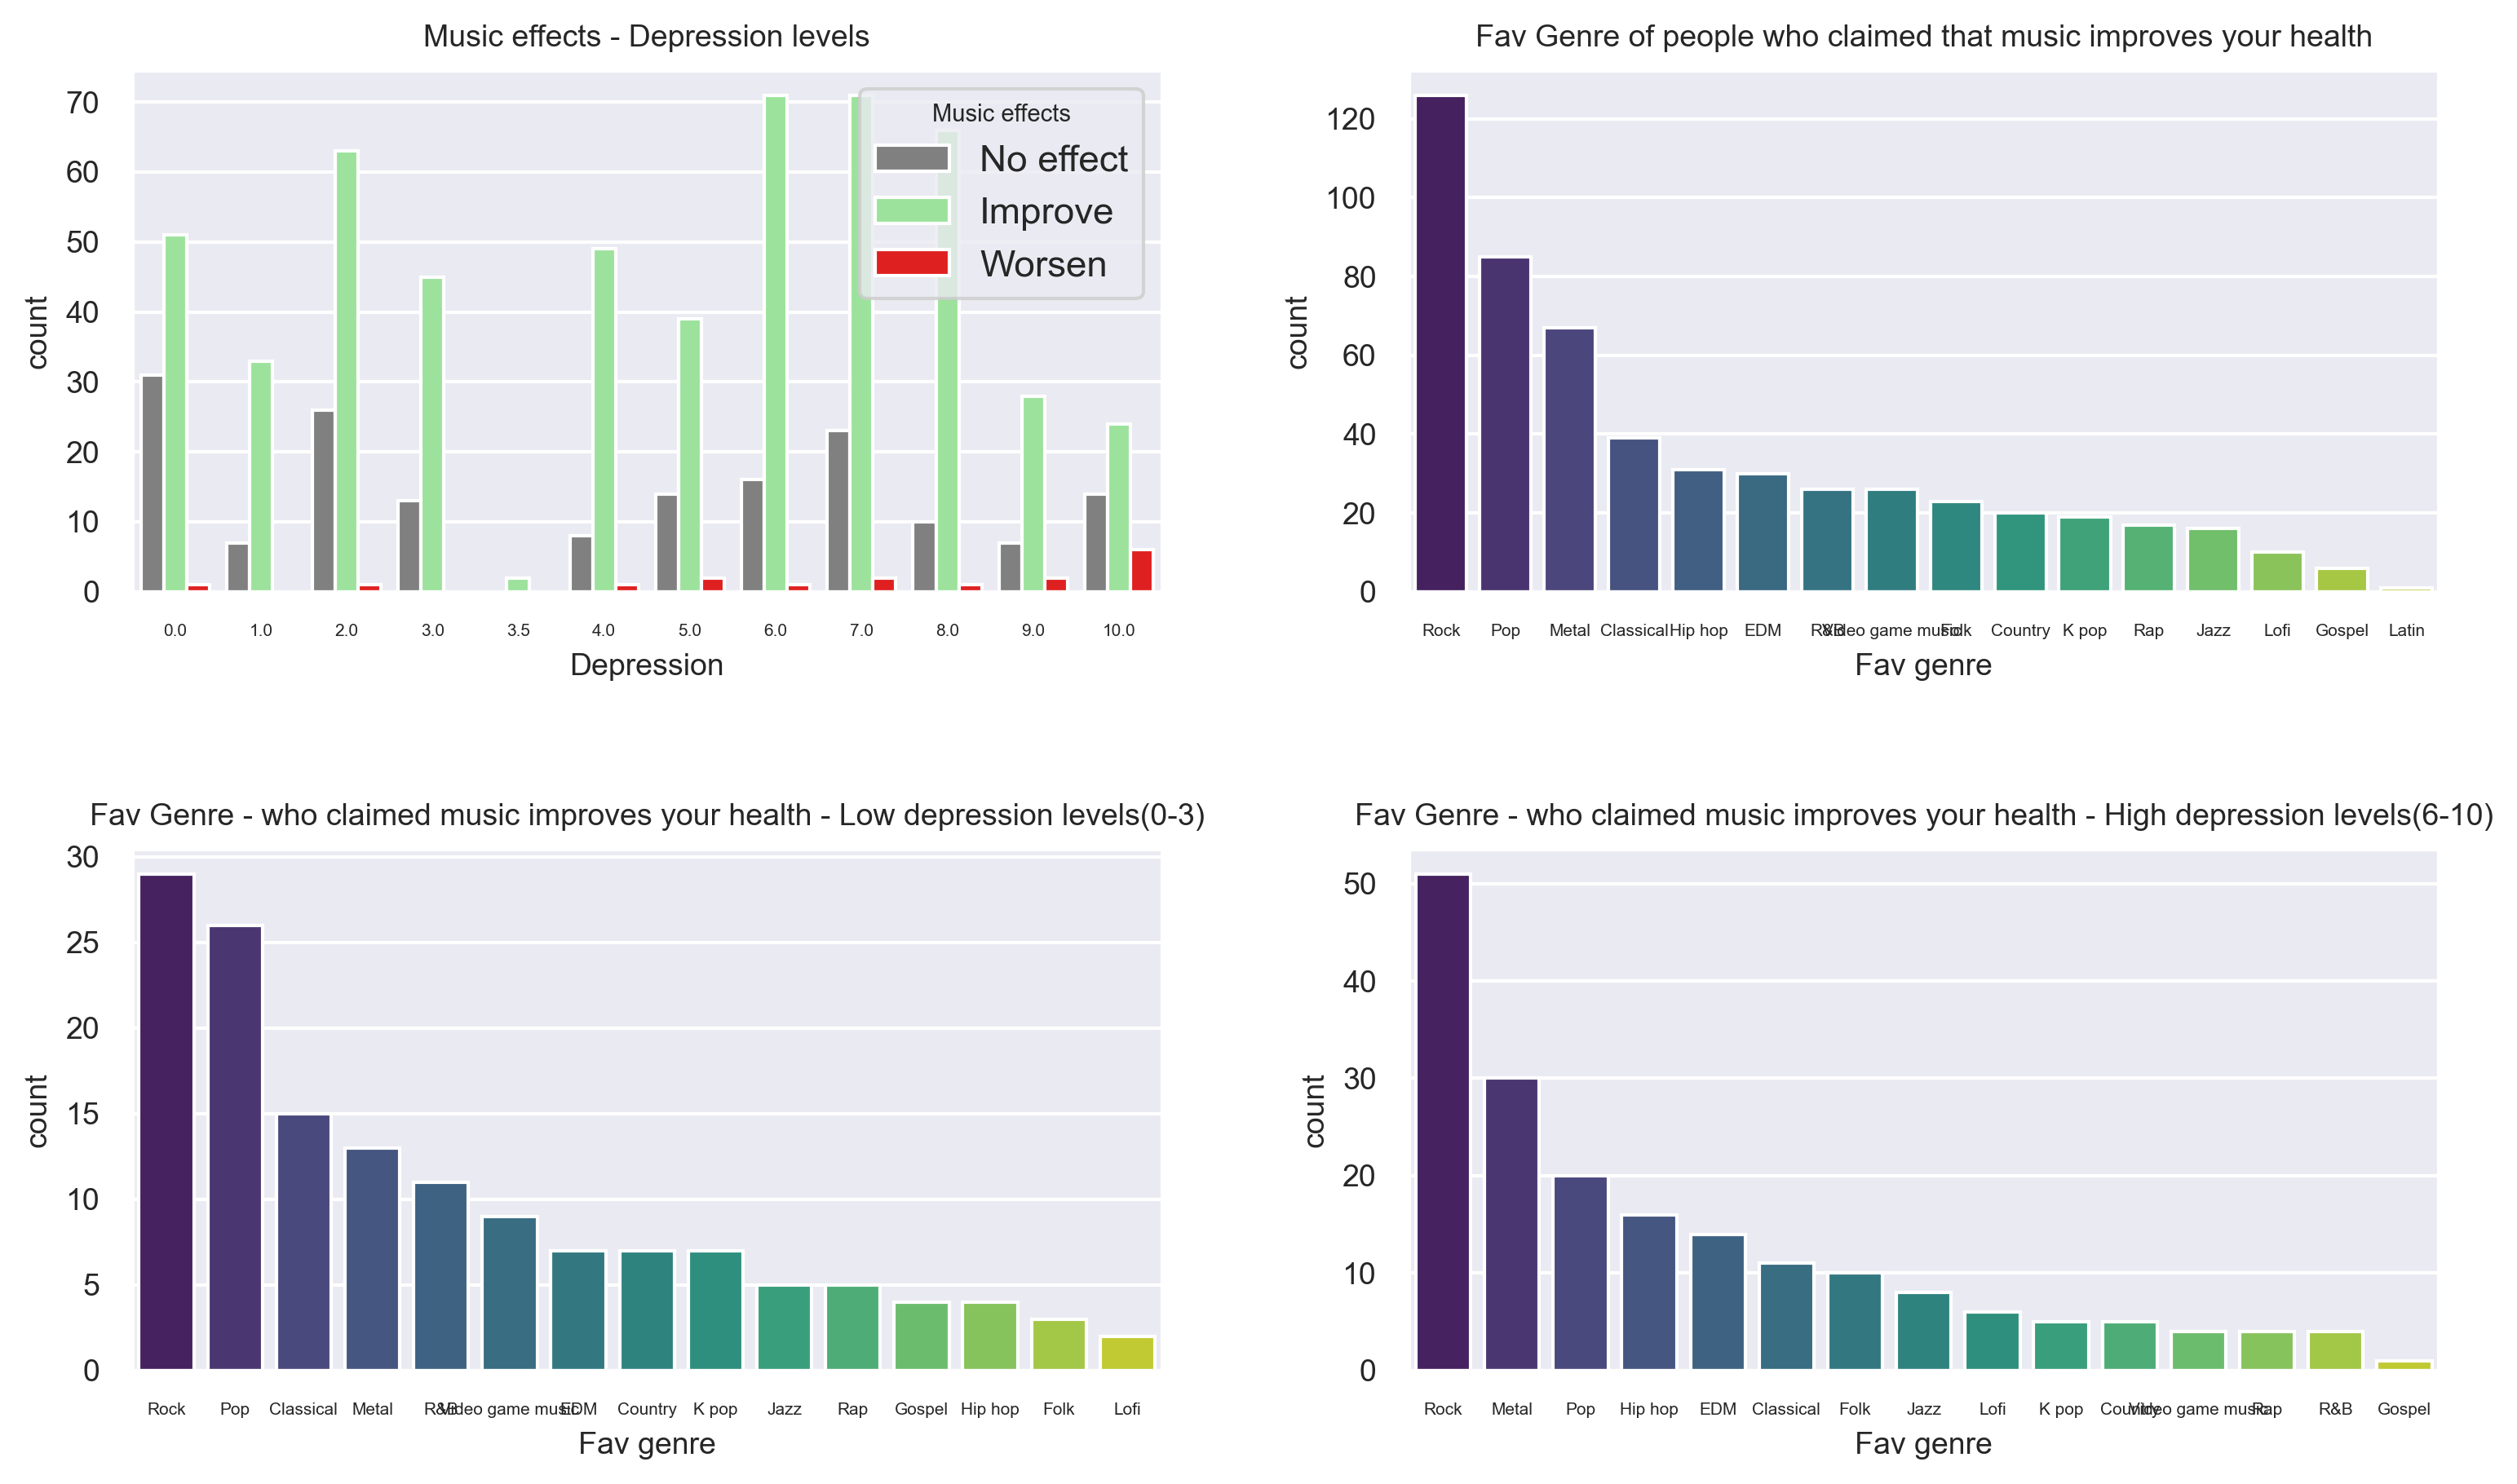

In [24]:
# Analysis based on Depression and music affects 
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 9,
                          'xtick.labelsize': 5, 'ytick.labelsize': 9, 
                          'legend.title_fontsize': 7, 'axes.titlesize': 9, 
                          'axes.titlepad': 7}):

    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw = {'width_ratios': [4, 4], 
                                                'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
    
    ## 1st graph

    sns.countplot(ax=ax_flat[0], x=mxmh['Depression'], hue=mxmh['Music effects'], 
                  palette=["grey","lightgreen","red"]).set_title('Music effects - Depression levels')

    ## 2nd graph
    music_improves_01=mxmh[mxmh['Music effects'] == 'Improve']
    sns.countplot(ax=ax_flat[1], x=music_improves_01['Fav genre'], 
                  palette="viridis",
                  order = music_improves_01['Fav genre'].value_counts().index).set_title('Fav Genre of people who claimed that music improves your health')
    
    ## 3rd graph
    music_improves_dep=mxmh[(mxmh['Depression'] < 3) & (mxmh['Music effects'] == 'Improve')]
    sns.countplot(ax=ax_flat[2], x=music_improves_dep['Fav genre'], palette="viridis",
                  order = music_improves_dep['Fav genre'].value_counts().index).set_title('Fav Genre - who claimed music improves your health - Low depression levels(0-3)')
  
    ## 4th graph
    music_improves_dep2=mxmh[(mxmh['Depression'] > 6) & (mxmh['Music effects'] == 'Improve')]
    sns.countplot(ax=ax_flat[3], x=music_improves_dep2['Fav genre'], palette="viridis",
                  order = music_improves_dep2['Fav genre'].value_counts().index).set_title('Fav Genre - who claimed music improves your health - High depression levels(6-10)')
      
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=3)
    plt.show()

Subplot (1) – Music effects – Depression levels:
x-axis: self-reported depression level scale where 0 - I do not experience this and 10 - I experience this regularly, constantly/or to an extreme.
y-axis: count
hue: the ones who’ve said music ‘improve’ mental health, music has ‘no effect’ over mental health and music ‘worsen’ mental health conditions
Summary: 
People with all different ranking of depression levels have said that they believe music improves mental conditions. The ones who have said that music worsens mental health issues are very low and have reported themselves to have highest level of depression. From the visualisations, it is evident that majority believe in music therapy. Moving forward, subplot(2) is when we plot the favourite genre people who say music ‘improves’ listen to..

Subplot (2) - Fav Genre of people who claimed that music improves your health
The ones who’ve said that music improves their health are the ones who have Rock and Pop as their favourite genres. Latin seems to be the least favourite to these people.

Subplot (3) - Fav Genre - who claimed music improves your health - Low depression levels(0-3)
This count plot indicates the favourite genre of people who claimed that music improves mental conditions and who have low depression levels (0-3). 
Rock, pop and classical music are their favourites.

Subplot (4) - Fav Genre - who claimed music improves your health - High depression levels(6-10)
This count plot indicates the favourite genre of people who claimed that music improves mental conditions and who have high depression levels (6-10). 
To this set, Rock, metal and pop music stands out and are their favourites.


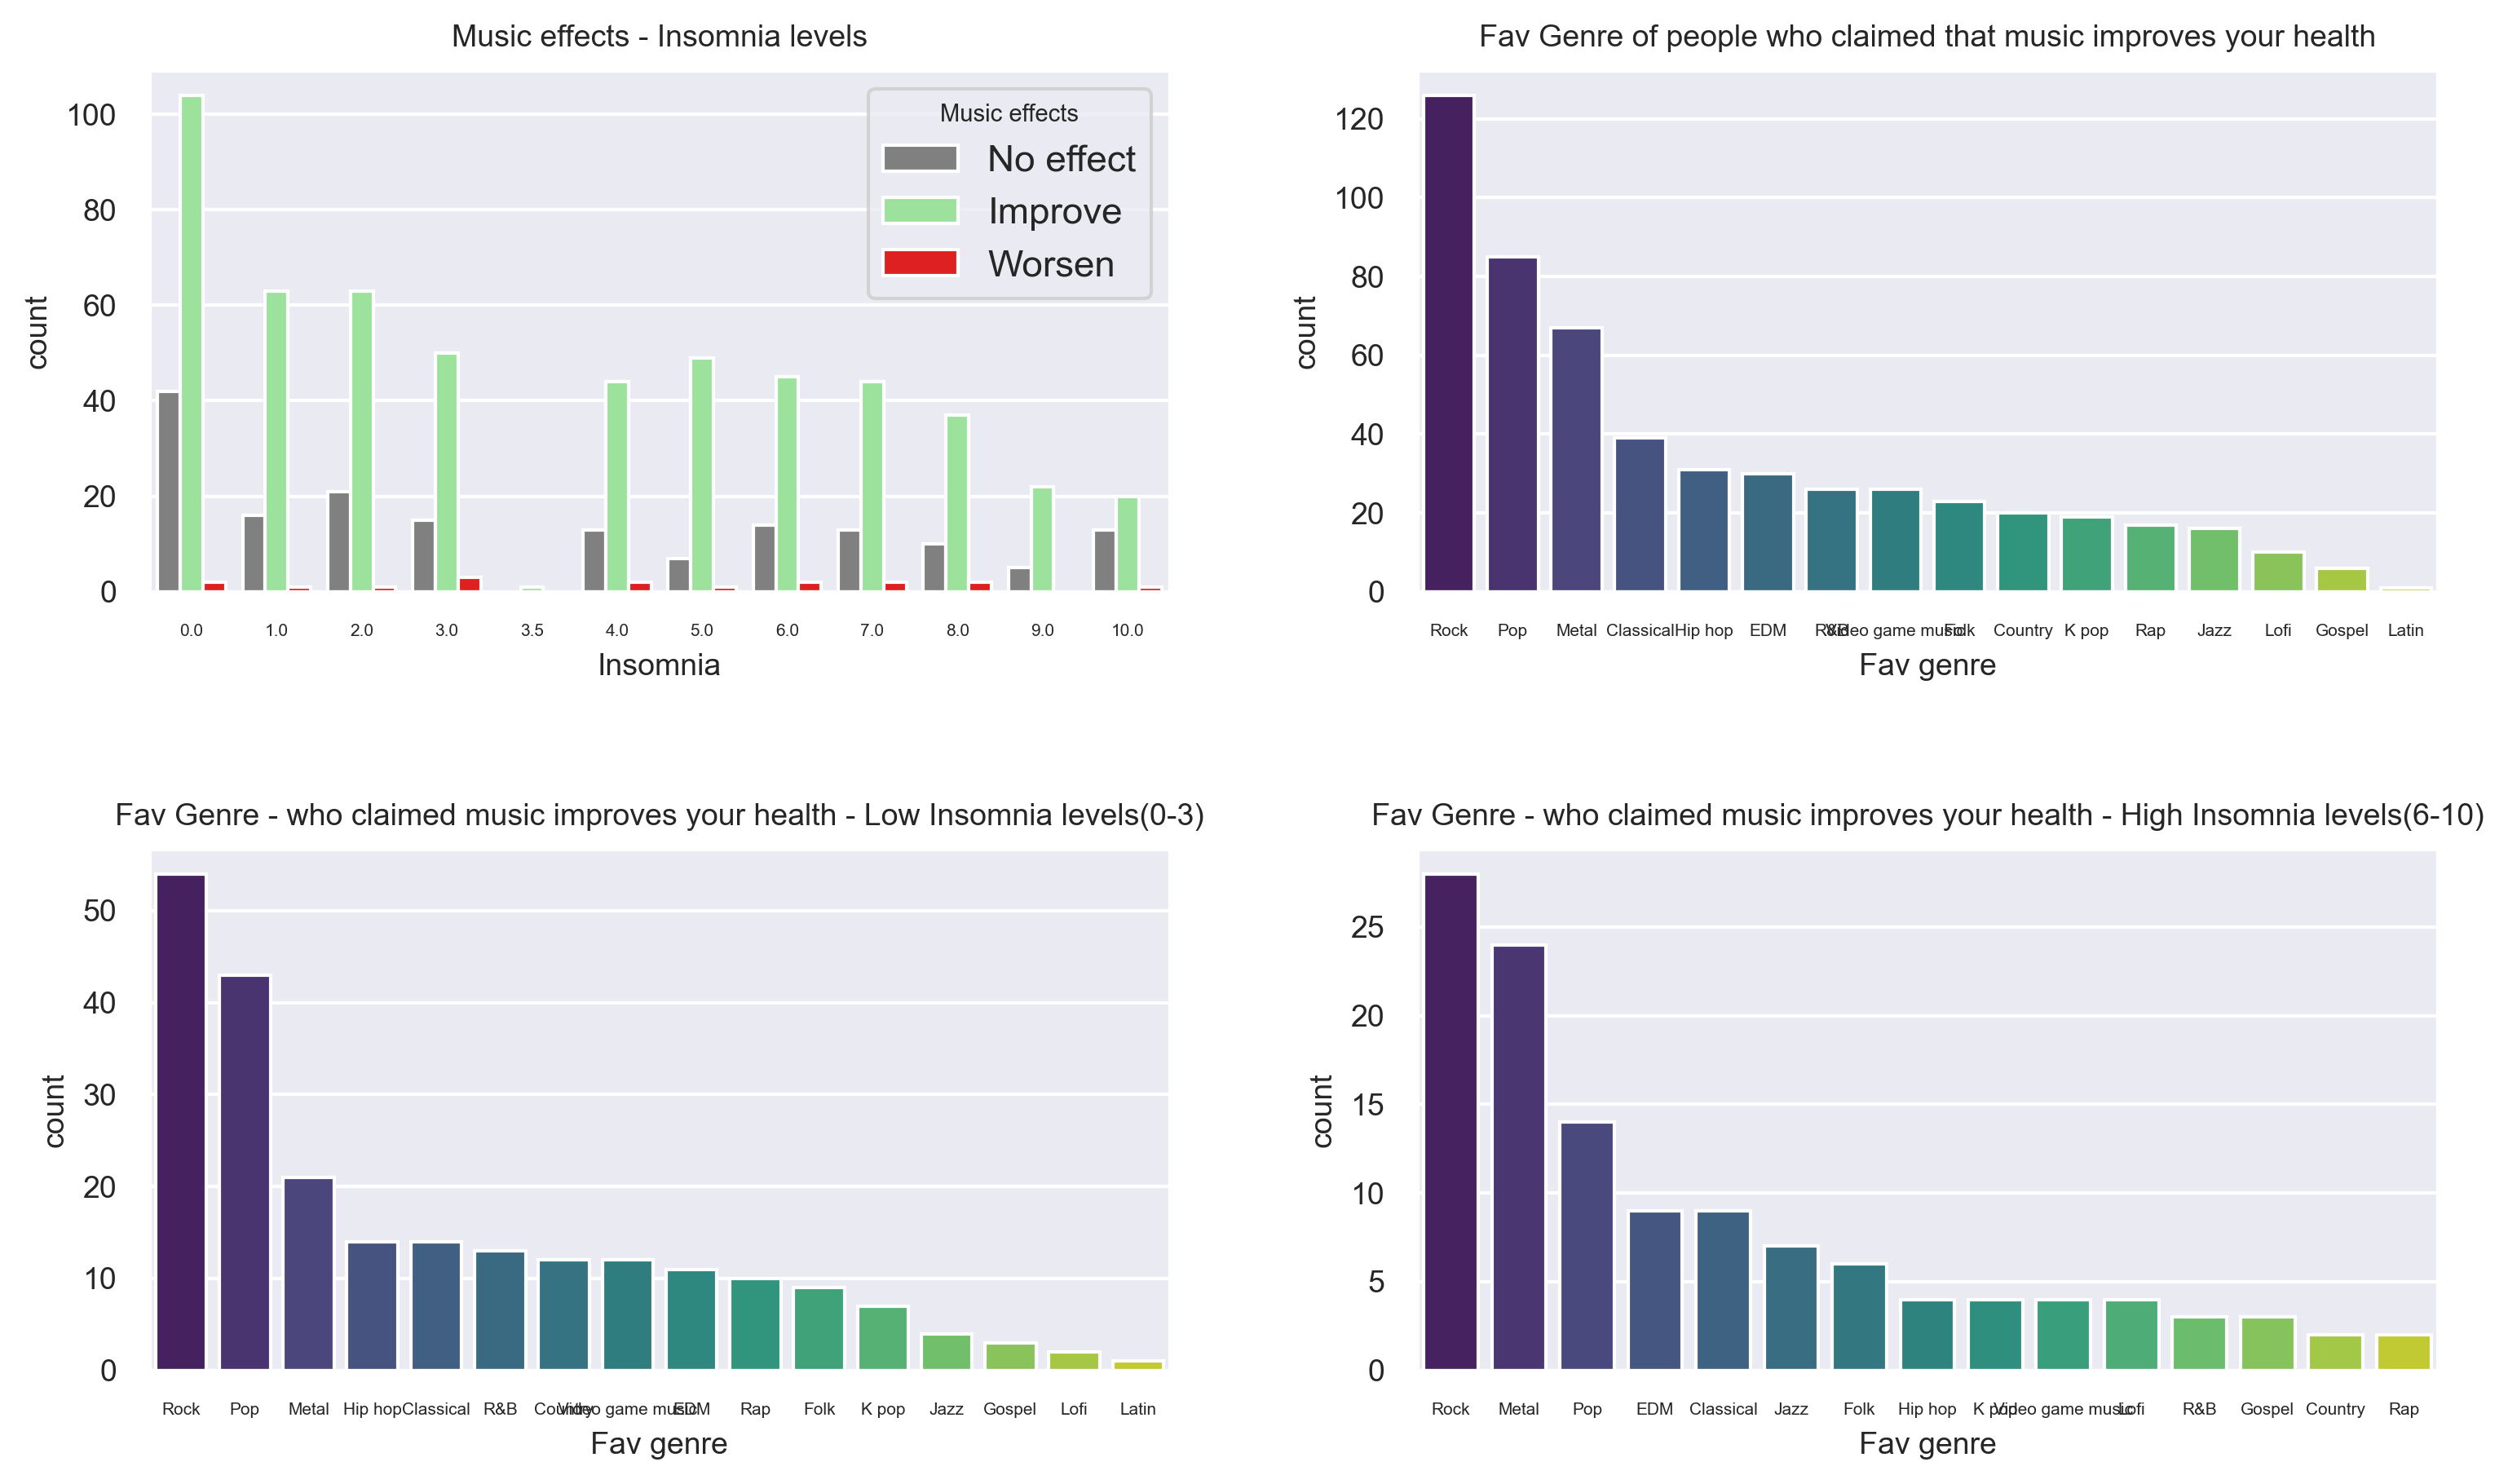

In [25]:
# Analysis based on Insomnia and music affects 
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 9,
                          'xtick.labelsize': 5, 'ytick.labelsize': 9, 
                          'legend.title_fontsize': 7, 'axes.titlesize': 9, 
                          'axes.titlepad': 7}):

    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw = {'width_ratios': [4, 4], 
                                                'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
    
    ## 1st graph

    sns.countplot(ax=ax_flat[0], x=mxmh['Insomnia'], hue=mxmh['Music effects'], 
                  palette=["grey","lightgreen","red"]).set_title('Music effects - Insomnia levels')

    ## 2nd graph
    music_improves_02=mxmh[mxmh['Music effects'] == 'Improve']
    sns.countplot(ax=ax_flat[1], x=music_improves_02['Fav genre'], 
                  palette="viridis",
                  order = music_improves_02['Fav genre'].value_counts().index).set_title('Fav Genre of people who claimed that music improves your health')
    
    ## 3rd graph
    music_improves_in=mxmh[(mxmh['Insomnia'] < 3) & (mxmh['Music effects'] == 'Improve')]
    sns.countplot(ax=ax_flat[2], x=music_improves_in['Fav genre'], palette="viridis",
                  order = music_improves_in['Fav genre'].value_counts().index).set_title('Fav Genre - who claimed music improves your health - Low Insomnia levels(0-3)')
  
    ## 4th graph
    music_improves_in2=mxmh[(mxmh['Insomnia'] > 6) & (mxmh['Music effects'] == 'Improve')]
    sns.countplot(ax=ax_flat[3], x=music_improves_in2['Fav genre'], palette="viridis",
                  order = music_improves_in2['Fav genre'].value_counts().index).set_title('Fav Genre - who claimed music improves your health - High Insomnia levels(6-10)')
      
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=3)
    plt.show()

Subplot (1) – Music effects – Insomnia levels:
x-axis: self-reported Insomnia level scale where 0 - I do not experience this and 10 - I experience this regularly, constantly/or to an extreme.
y-axis: count
hue: the ones who’ve said music ‘improve’ mental health, music has ‘no effect’ over mental health and music ‘worsen’ mental health conditions
Summary: 
People with all different ranking of Insomnia levels have said that they believe music improves mental conditions. The ones who have said that music worsens mental health issues are very low and have reported themselves to have lowest level of insomnia. From the visualisations, it is evident that majority believe in music therapy. Moving forward, subplot(2) is when we plot the favourite genre people who say music ‘improves’ listen to..

Subplot (2) - Fav Genre of people who claimed that music improves your health
The ones who’ve said that music improves their health are the ones who have Rock and Pop as their favourite genres. Latin seems to be the least favourite to these people.

Subplot (3) - Fav Genre - who claimed music improves your health - Low Insomnia levels(0-3)
This count plot indicates the favourite genre of people who claimed that music improves mental conditions and who have low insomnia levels (0-3). 
Rock, pop and metal music are their favourites.

Subplot (4) - Fav Genre - who claimed music improves your health - High Insomnia levels(6-10)
This count plot indicates the favourite genre of people who claimed that music improves mental conditions and who have high insomnia levels (6-10). 
To this set, Rock, metal and pop music stands out and are their favourites. 


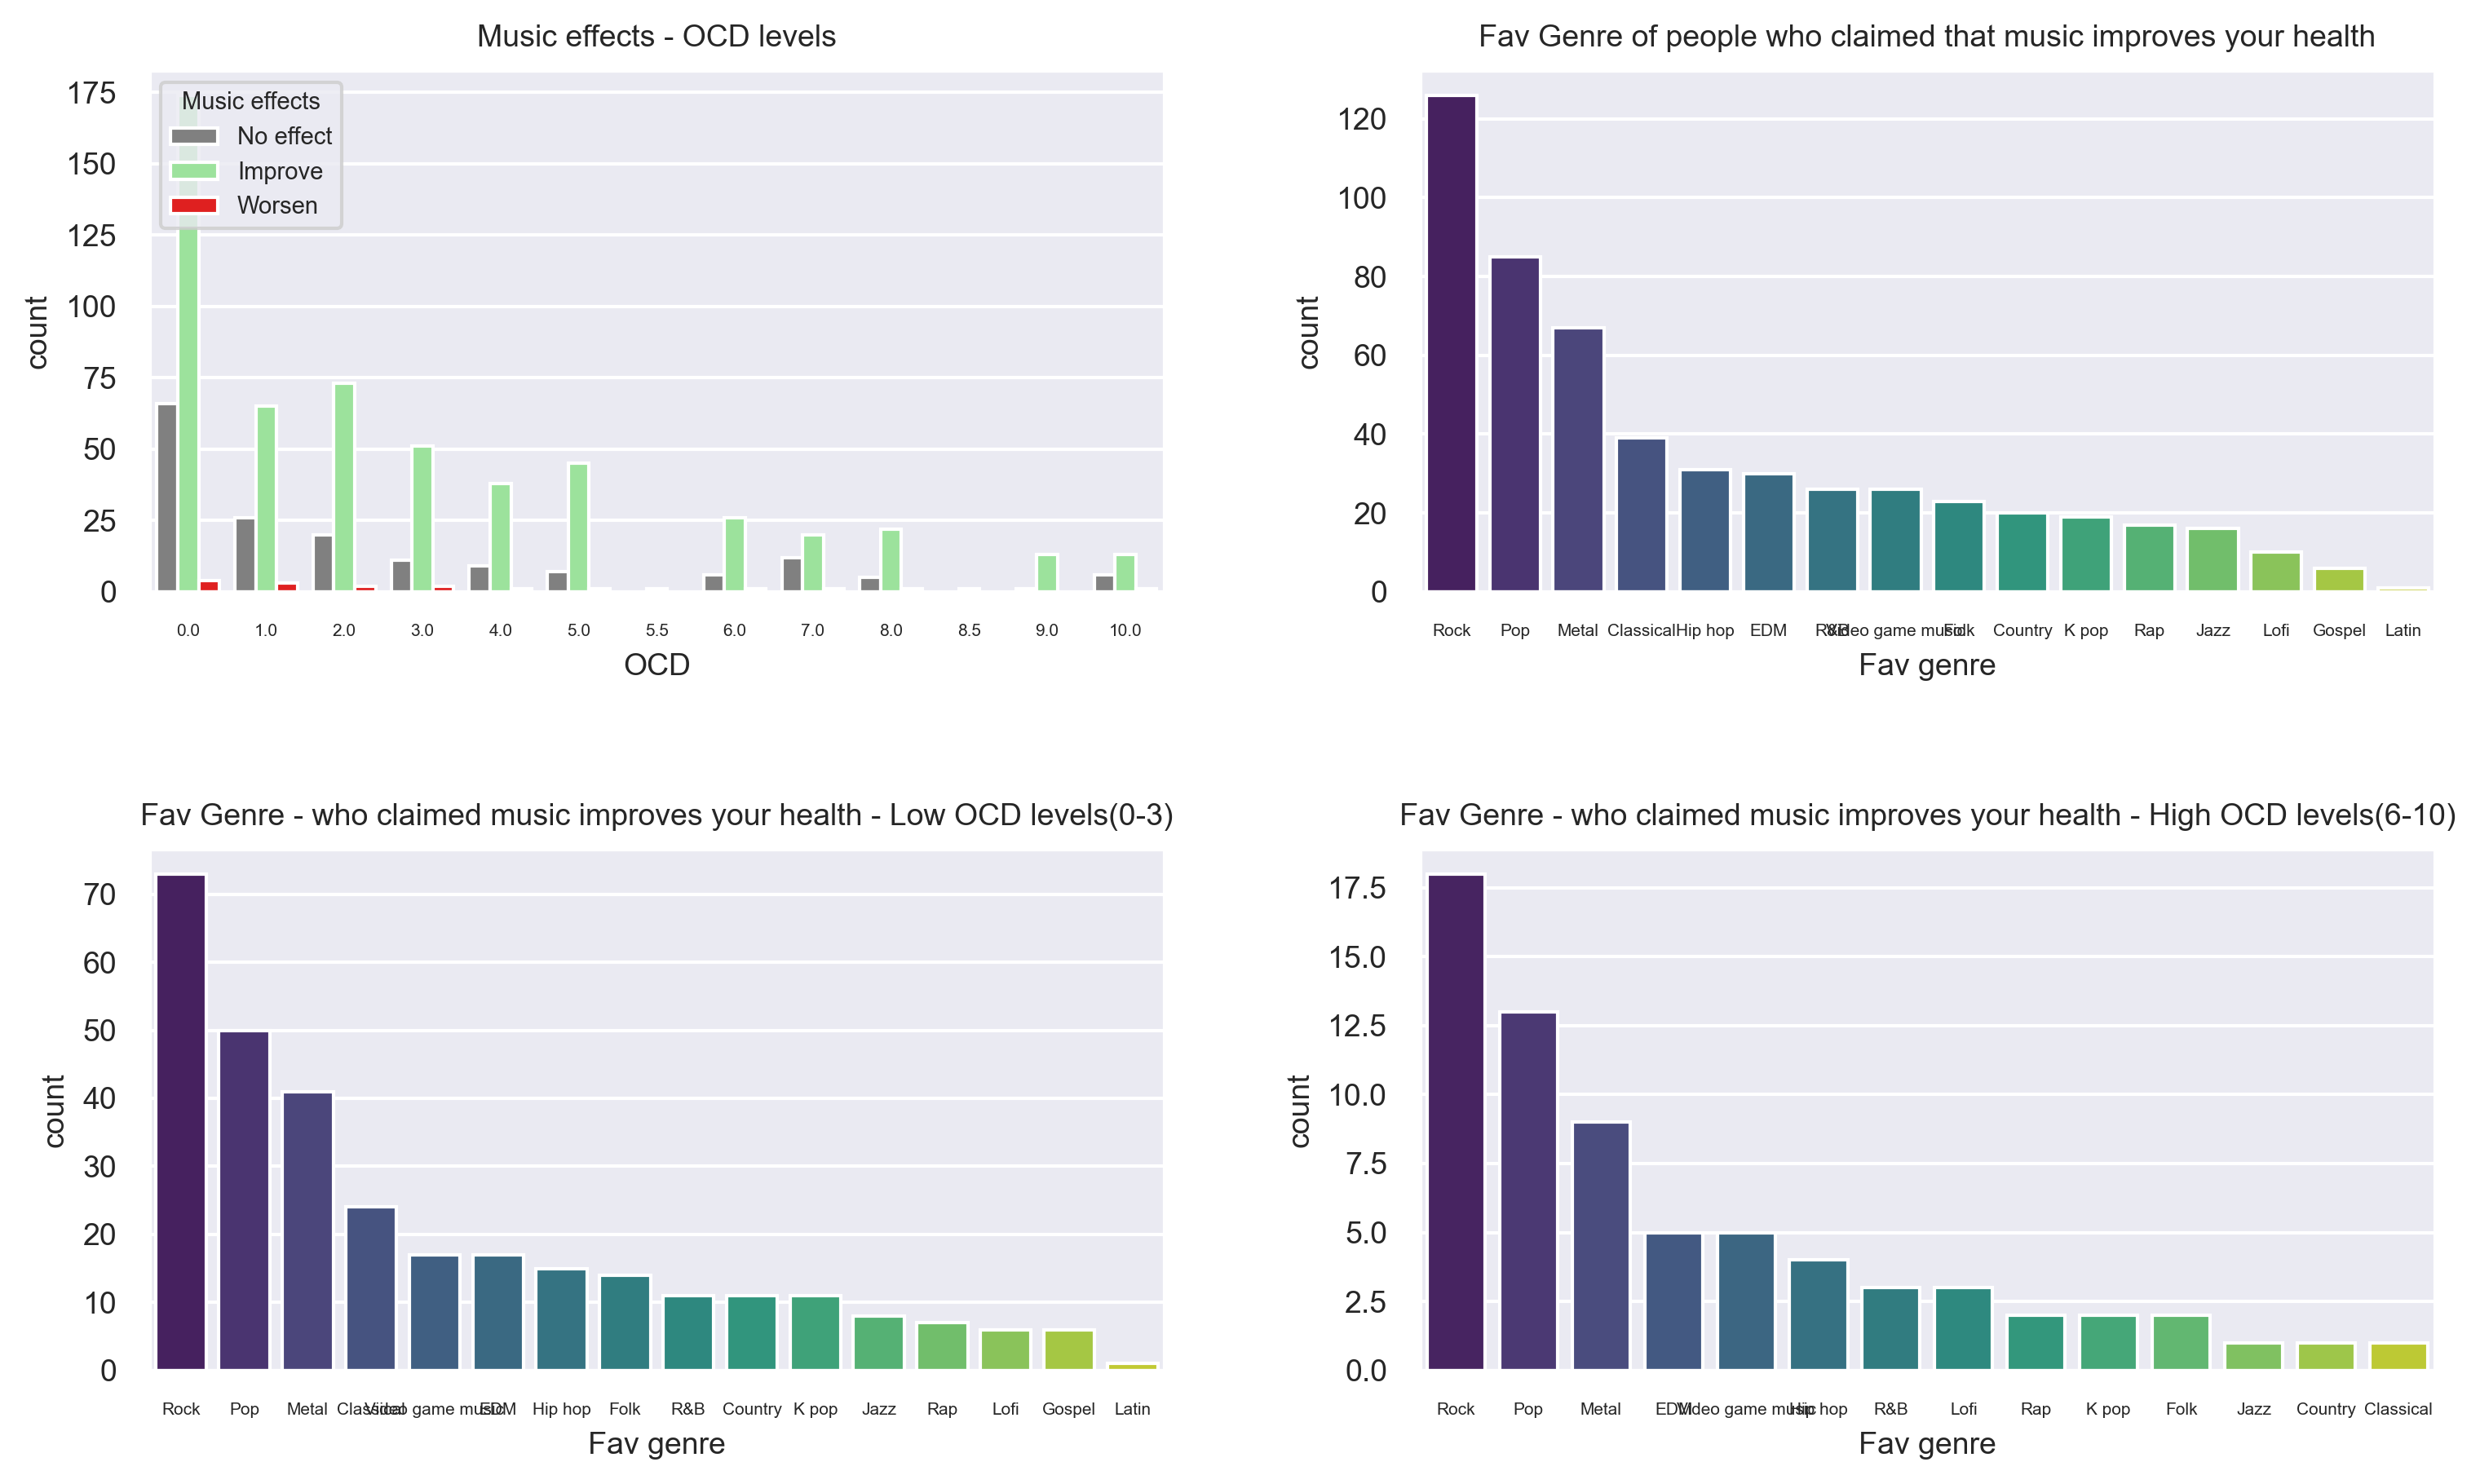

In [26]:
# Analysis based on OCD and music affects 
with plt.rc_context(rc = {'figure.dpi': 300, 'axes.labelsize': 9,
                          'xtick.labelsize': 5, 'ytick.labelsize': 9, 'legend.fontsize':7,
                          'legend.title_fontsize': 7, 'axes.titlesize': 9, 
                          'axes.titlepad': 7}):

    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 6), gridspec_kw = {'width_ratios': [4, 4], 
                                                'height_ratios': [3, 3]})
    ax_flat = ax_4.flatten()
    
    ## 1st graph

    sns.countplot(ax=ax_flat[0], x=mxmh['OCD'], hue=mxmh['Music effects'], 
                  palette=["grey","lightgreen","red"]).set_title('Music effects - OCD levels')

    ## 2nd graph
    music_improves_03=mxmh[mxmh['Music effects'] == 'Improve']
    sns.countplot(ax=ax_flat[1], x=music_improves_03['Fav genre'], 
                  palette="viridis",
                  order = music_improves_03['Fav genre'].value_counts().index).set_title('Fav Genre of people who claimed that music improves your health')
    
    ## 3rd graph
    music_improves_ocd=mxmh[(mxmh['OCD'] < 3) & (mxmh['Music effects'] == 'Improve')]
    sns.countplot(ax=ax_flat[2], x=music_improves_ocd['Fav genre'], palette="viridis",
                  order = music_improves_ocd['Fav genre'].value_counts().index).set_title('Fav Genre - who claimed music improves your health - Low OCD levels(0-3)')
  
    ## 4th graph
    music_improves_ocd2=mxmh[(mxmh['OCD'] > 6) & (mxmh['Music effects'] == 'Improve')]
    sns.countplot(ax=ax_flat[3], x=music_improves_ocd2['Fav genre'], palette="viridis",
                  order = music_improves_ocd2['Fav genre'].value_counts().index).set_title('Fav Genre - who claimed music improves your health - High OCD levels(6-10)')
    
    plt.tight_layout(pad=0.4, w_pad=3, h_pad=3)
    plt.show()

Subplot (1) – Music effects – OCD levels:
x-axis: self-reported OCD level scale where 0 - I do not experience this and 10 - I experience this regularly, constantly/or to an extreme.
y-axis: count
hue: the ones who’ve said music ‘improve’ mental health, music has ‘no effect’ over mental health and music ‘worsen’ mental health conditions
Summary: 
People with OCD believe music improves mental conditions. 
From the visualisations, it is evident that majority believe in music therapy. Moving forward, subplot(2) is when we plot the favourite genre people who say music ‘improves’ listen to..

Subplot (2) - Fav Genre of people who claimed that music improves your health
The ones who’ve said that music improves their health are the ones who have Rock and Pop as their favourite genres. Latin seems to be the least favourite to these people.

Subplot (3) - Fav Genre - who claimed music improves your health - Low OCD levels(0-3)
This count plot indicates the favourite genre of people who claimed that music improves mental conditions and who have low OCD levels (0-3). 
Rock, pop and metal music are their favourites.

Subplot (4) - Fav Genre - who claimed music improves your health - High OCD levels(6-10)
This count plot indicates the favourite genre of people who claimed that music improves mental conditions and who have high OCD levels (6-10). 
To this set, Rock, pop and metal music stands out and are their favourites. 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

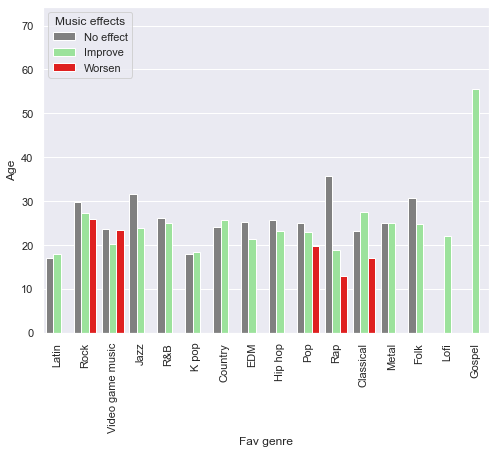

In [27]:
# Plotting fav genre by age with music effects
plt.figure(figsize=(8,6))
sns.barplot(x=mxmh['Fav genre'], y=mxmh['Age'], hue=mxmh['Music effects'], errwidth=0,  palette=["grey","lightgreen","red"])
plt.xticks(rotation=90)

Every Music listeners of every age showing some kind of improvement but Rock, Video Game Music, Pop, Rap, and Classical have worsen condition.